SENSITIVITY ANALYSIS FOR SINGLE PRISM

In [1]:
import numpy

def deg2rad(degrees):
    return numpy.radians(degrees)

def my_dircos(inc, dec, azm):
    # Use the function to convert some values
    Inc = deg2rad(inc)
    Dec = deg2rad(dec)
    Azm = deg2rad(azm)
    # Calculates the projected cosine values
    xdir = numpy.cos(Inc) * numpy.cos(Dec - Azm)
    ydir = numpy.cos(Inc) * numpy.sin(Dec - Azm)
    zdir = numpy.sin(Inc)
    # Return the final output
    return xdir, ydir, zdir

# Call the function for source (s) and field (f)
Ma, Mb, Mc = my_dircos(-34.25, -18.5, 0)  # s -> source
Fa, Fb, Fc = my_dircos(-45, -30, 0)  # f -> field

# Print the output
print("Source:")
print(f"Ma: {Ma}, Mb: {Mb}, Mc: {Mc}")

print("\nField:")
print(f"Fa: {Fa}, Fb: {Fb}, Fc: {Fc}")

import numpy as np

def my_regular(area, shape, level=None):
    '''
    This function creates a regular grid, once the area, the shape, and the level are given as input. 
    The area must have four elements named as [xi, xf, yi, yf]. The shape represents the grid size. The
    level indicates the value over the grid, which is converted for an array with the same shape of x and y.
    
    Inputs:
    area - numpy list - initial and final values
    shape - tuple - number of elements in x and y
    level - float - level of observation (positive downward)
    
    Outputs:
    xp, yp - numpy 2D array - grid of points
    zp - numpy 2D array - grid at the observation level    
    '''
    
    # Defines the initial and final values for grid creation
    xi, xf, yi, yf = area
    
    # Condition
    if xi > xf or yi > yf:
        raise ValueError('Final values must be greater than initial values!')
        
    # Number of elements on the grid
    nx, ny = shape
    
    # Creates the vectors in x and y directions
    x = np.linspace(xi, xf, nx)
    y = np.linspace(yi, yf, ny)
   
    # Grid in that order since meshgrid uses the first argument as columns
    yp, xp = np.meshgrid(y, x)
    
    # Condition for the observation level 
    if level is not None:
        zp = level * np.ones(nx * ny)
        # Reshape zp - level of observation
        return xp.reshape(nx * ny), yp.reshape(nx * ny), zp
    else:
        # If zp is not given, returns xp and yp only
        return xp.reshape(nx * ny), yp.reshape(nx * ny)


Source:
Ma: 0.7838746122482708, Mb: -0.2622807763347739, Mc: -0.5628049276950685

Field:
Fa: 0.6123724356957946, Fb: -0.35355339059327373, Fc: -0.7071067811865476


In [2]:
import numpy as np

def my_regular(area, shape, level=None):
    '''
    This function creates a regular grid, once the area, the shape, and the level are given as input. 
    The area must have four elements named as [xi, xf, yi, yf]. The shape represents the grid size. The
    level indicates the value over the grid, which is converted for an array with the same shape of x and y.
    
    Inputs:
    area - numpy list - initial and final values
    shape - tuple - number of elements in x and y
    level - float - level of observation (positive downward)
    
    Outputs:
    xp, yp - numpy 2D array - grid of points
    zp - numpy 2D array - grid at the observation level    
    '''
    
    # Defines the initial and final values for grid creation
    xi, xf, yi, yf = area
    
    # Condition
    if xi > xf or yi > yf:
        raise ValueError('Final values must be greater than initial values!')
        
    # Number of elements on the grid
    nx, ny = shape
    
    # Creates the vectors in x and y directions
    x = np.linspace(xi, xf, nx)
    y = np.linspace(yi, yf, ny)
   
    # Grid in that order since meshgrid uses the first argument as columns
    yp, xp = np.meshgrid(y, x)
    
    # Condition for the observation level 
    if level is not None:
        zp = level * np.ones(nx * ny)
        # Reshape zp - level of observation
        return xp.reshape(nx * ny), yp.reshape(nx * ny), zp
    else:
        # If zp is not given, returns xp and yp only
        return xp.reshape(nx * ny), yp.reshape(nx * ny)


In [3]:
import numpy as np

def deg2rad(degrees):
    return np.radians(degrees)

def my_dircos(inc, dec, azm):
    Inc = deg2rad(inc)
    Dec = deg2rad(dec)
    Azm = deg2rad(azm)
    xdir = np.cos(Inc) * np.cos(Dec - Azm)
    ydir = np.cos(Inc) * np.sin(Dec - Azm)
    zdir = np.sin(Inc)
    return xdir, ydir, zdir

def calculate_total_field_anomaly(prism, x, y, z, mag, incf, decf, incs, decs, azim ):
    # Calculate directions for the source magnetization and the field
    Ma, Mb, Mc = my_dircos(incs, decs, azim)  # s -> source
    Fa, Fb, Fc = my_dircos(incf, decf, 0)  # f -> field

    # Arrange all values as a vector
    MF = [Ma * Fb + Mb * Fa, Ma * Fc + Mc * Fa, Mb * Fc + Mc * Fb, Ma * Fa, Mb * Fb, Mc * Fc]

    # Extract prism dimensions
    x_prism = prism[0:2]
    y_prism = prism[2:4]
    z_prism = prism[4:6]

    # Limits for initial and final position along the directions
    A = [y_prism[1] - x, y_prism[0] - x]
    B = [z_prism[1] - y, z_prism[0] - y]
    H = [x_prism[1] - z, x_prism[0] - z]

    # Set the initial value for mag
    #mag = 2.0  # Adjust this value as needed

    # Create the zero array to allocate the total field result
    tfa = np.zeros_like(x)

    # Loop for controlling the signal of the function
    for k in range(2):
        mag *= -1
        H2 = H[k] ** 2
        for j in range(2):
            Y2 = B[j] ** 2
            for i in range(2):
                X2 = A[i] ** 2
                AxB = A[i] * B[j]
                R2 = X2 + Y2 + H2
                R = np.sqrt(R2)
                HxR = H[k] * R
                tfa += ((-1.) ** (i + j)) * mag * (
                            0.5 * (MF[2]) * np.log((R - A[i]) / (R + A[i])) +
                            0.5 * (MF[1]) * np.log((R - B[j]) / (R + B[j])) -
                            (MF[0]) * np.log(R + H[k]) -
                            (MF[3]) * np.arctan(AxB, X2 + HxR + H2) -
                            (MF[4]) * np.arctan(AxB, R2 + HxR - X2) +
                            (MF[5]) * np.arctan(AxB, HxR))

    # Multiplying for constants conversion
    tfa *= t2nt * cm

    return tfa

t2nt = 1.e9  # Testa to nT - conversion
cm = 1.e-7  # Magnetization constant

# Define prism coordinates
model = [-500., 2500., -500., 3000., 550., 1000.]

# Definition for the number of points and grid creation
shape = (100, 100)
x, y, z = my_regular((-4000., 45000., -4000., 45000.), shape, -50.)

# Define magnetic properties
incs, decs, azim = -34.25, -18.5, 20
incf, decf = -45,30
mag = 2.

# Calculate total field anomaly
tfa_result = calculate_total_field_anomaly(model, x, y, z, mag, incf, decf, incs, decs, azim)

# Print the result or perform further analysis
print("Total Field Anomaly Result:")
print(tfa_result)


Total Field Anomaly Result:
[-8.08901588e-01 -1.00214225e+00 -1.23849152e+00 ... -4.31419430e-04
 -4.25499569e-04 -4.19574461e-04]


In [4]:
import numpy as np
from scipy.optimize import minimize

# Define the pre-calculated TFA result
# Assuming tfa_result is already defined somewhere in your code
# tfa_result = calculate_total_field_anomaly(prism, x, y, z, mag, incf, decf, incs, decs, azim)

# Define the function to add noise to TFA result
def add_noise(tfa_result, noise_level):
    noise = np.random.normal(scale=noise_level, size=tfa_result.shape)
    return tfa_result + noise


noise_level = 0.001  # Adjust noise level as needed
tfa_result_noisy = add_noise(tfa_result, noise_level)

# Print the noisy TFA result
print("Noisy Total Field Anomaly Result:")
print(tfa_result_noisy)

Noisy Total Field Anomaly Result:
[-8.08633258e-01 -9.99986390e-01 -1.23844605e+00 ... -2.84530833e-04
 -2.20896696e-04  1.10876746e-03]


In [5]:
import numpy as np

# Define constants and model parameters
# model = [param1, param2, param3, param4, param5, param6]
# x, y, z, mag, incf, decf, incs, decs, azim are pre-defined constants or data




# Define loss function for depth parameter with regularization
def loss_depth(depth, lambda_reg=0.01):
    # Calculate TFA using the current depth
    tfa_calculated = calculate_total_field_anomaly([model[0], depth, model[2], model[3], model[4], model[5]], x, y, z, mag, incf, decf, incs, decs, azim)
    
    # Add noise to the calculated TFA
    tfa_noisy = add_noise(tfa_calculated, noise_level=0.1)  # Adjust noise level as needed
    
    # Calculate mean squared error
    mse = np.mean((tfa_noisy - tfa_result) ** 2)
    
    # Add regularization term
    reg_term = lambda_reg * depth ** 2
    loss = mse + reg_term
    
    return loss

# Define gradient function for depth parameter with regularization
def gradient_depth(depth, lambda_reg=0.0):
    eps = 1e-6  # small value for numerical stability
    grad = (loss_depth(depth + eps, lambda_reg) - loss_depth(depth - eps, lambda_reg)) / (2 * eps)
    return grad

# Gradient Descent Optimization for Depth Parameter with regularization
learning_rate = 0.0001 # Adjust learning rate as needed
max_iterations = 100
tolerance = 1e-4
lambda_reg = 10.0 # Regularization strength

depth = 950  # Initial guess for depth
for i in range(max_iterations):
    grad = gradient_depth(depth, lambda_reg)
    depth -= learning_rate * grad
    
    if abs(grad) < tolerance:
        break

print("Optimized Depth:", depth)


Optimized Depth: 780.8427143841982


In [29]:
import numpy as np


# Define loss function for length parameter with regularization
def loss_length(length, lambda_reg=0.01):
    # Calculate TFA using the current length
    tfa_calculated = calculate_total_field_anomaly([model[0], model[1], length, model[3], model[4], model[5]], x, y, z, mag, incf, decf, incs, decs, azim)
    
    # Add noise to the calculated TFA
    tfa_noisy = add_noise(tfa_calculated, noise_level=0.1)  # Adjust noise level as needed
    
    # Calculate mean squared error
    mse = np.mean((tfa_noisy - tfa_result) ** 2)
    
    # Add regularization term
    reg_term = lambda_reg * length ** 2
    loss = mse + reg_term
    
    return loss

# Define gradient function for length parameter with regularization
def gradient_length(length, lambda_reg=0.01):
    eps = 1e-6  # small value for numerical stability
    grad = (loss_length(length + eps, lambda_reg) - loss_length(length - eps, lambda_reg)) / (2 * eps)
    return grad

# Gradient Descent Optimization for Length Parameter with regularization
learning_rate = 0.00001  # Adjust learning rate as needed
max_iterations = 150
tolerance = 1e-4
lambda_reg = 0.00  # Regularization strength

length = 2000  # Initial guess for length
for i in range(max_iterations):
    grad = gradient_length(length, lambda_reg)
    length -= learning_rate * grad
    
    if abs(grad) < tolerance:
        break

print("Optimized Length:", length)


Optimized Length: 1998.946944222511


In [6]:
import numpy as np

# Define constants and model parameters
# model = [param1, param2, param3, param4, param5, param6]
# x
# Define loss function for magnitude parameter with regularization
def loss_magnitude(magnitude, lambda_reg=0.01):
    # Calculate TFA using the current magnitude
    tfa_calculated = calculate_total_field_anomaly([model[0], model[1], model[2], model[3], magnitude, model[5]], x, y, z, mag, incf, decf, incs, decs, azim)
    
    # Add noise to the calculated TFA
    tfa_noisy = add_noise(tfa_calculated, noise_level=0.1)  # Adjust noise level as needed
    
    # Calculate mean squared error
    mse = np.mean((tfa_noisy - tfa_result) ** 2)
    
    # Add regularization term
    reg_term = lambda_reg * magnitude ** 2
    loss = mse + reg_term
    
    return loss

# Define gradient function for magnitude parameter with regularization
def gradient_magnitude(magnitude, lambda_reg=0.01):
    eps = 1e-6  # small value for numerical stability
    grad = (loss_magnitude(magnitude + eps, lambda_reg) - loss_magnitude(magnitude - eps, lambda_reg)) / (2 * eps)
    return grad

# Gradient Descent Optimization for Magnitude Parameter with regularization
learning_rate = 0.00001  # Adjust learning rate as needed
max_iterations = 150
tolerance = 1e-4
lambda_reg = 0.01 # Regularization strength


magnitude = 2  # Initial guess for magnitude
for i in range(max_iterations):
    grad = gradient_magnitude(magnitude, lambda_reg)
    magnitude -= learning_rate * grad
    
    if abs(grad) < tolerance:
        break

print("Optimized Magnitude:", magnitude)


Optimized Magnitude: 2.1461075368941778


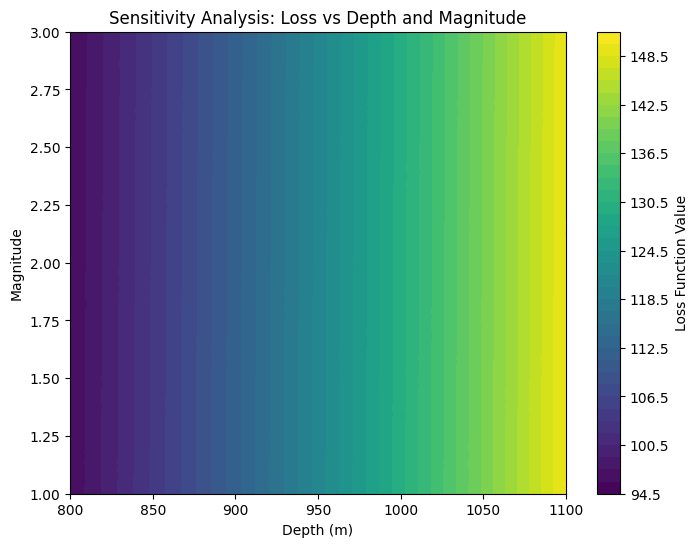

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of depth and magnitude values for sensitivity analysis
depth_range = np.linspace(800, 1100, 100)  # Adjust the range and resolution as needed
magnitude_range = np.linspace(1, 3, 100)

# Create a meshgrid for depth and magnitude
depth_grid, magnitude_grid = np.meshgrid(depth_range, magnitude_range)

# Initialize the loss matrix to store results
loss_matrix = np.zeros_like(depth_grid)

# Compute loss for each combination of depth and magnitude
for i in range(len(depth_range)):
    for j in range(len(magnitude_range)):
        depth = depth_range[i]
        magnitude = magnitude_range[j]
        loss_matrix[j, i] = loss_depth(depth, lambda_reg=0.0001) + loss_magnitude(magnitude, lambda_reg=0.0001)

# Plot the heatmap for sensitivity analysis
plt.figure(figsize=(8, 6))
plt.contourf(depth_grid, magnitude_grid, loss_matrix, levels=50, cmap="viridis")
plt.colorbar(label="Loss Function Value")
plt.title("Sensitivity Analysis: Loss vs Depth and Magnitude")
plt.xlabel("Depth (m)")
plt.ylabel("Magnitude")
plt.show()


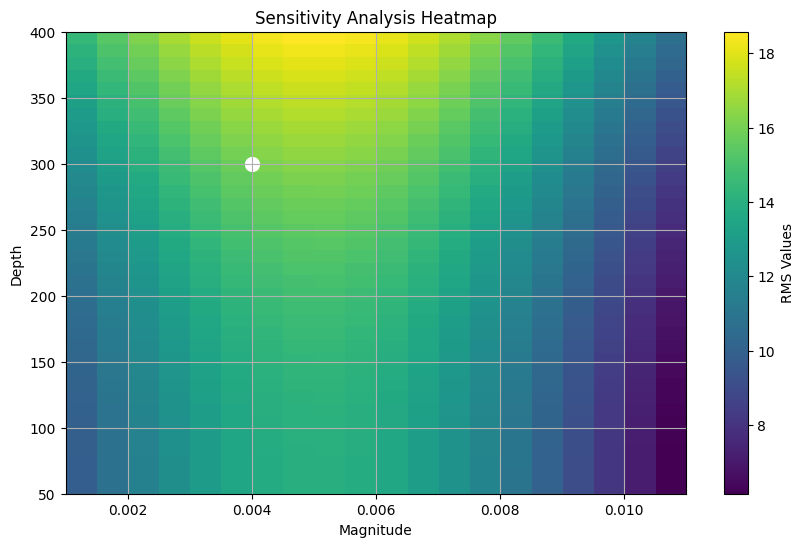

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define ranges
depth_range = np.arange(50, 401, 10)  # Depths from 900 to 1200, step size 10
magnitude_range = np.linspace(0.001, 0.011, 20)  # Magnitudes from 1 to 3, 20 points
rms_range_new = np.linspace(8, 14, 20)  # RMS values from 8 to 14, 20 points

# Generate example RMS values (using a different function with non-linearity)
rms_values_new = np.zeros((len(depth_range), len(magnitude_range)))
for i in range(len(depth_range)):
    for j in range(len(magnitude_range)):
        # New RMS function using sine and quadratic relationships
        depth_factor = (depth_range[i] - 50)**2 / 400**2
        magnitude_factor = np.sin(2 * np.pi * magnitude_range[j] * 50)
        rms_values_new[i, j] = 8 + 6 * (depth_factor + magnitude_factor)  # Adjust the constants as needed



# Plotting heatmap
plt.figure(figsize=(10, 6))
plt.imshow(rms_values_new, origin='lower', cmap='viridis', aspect='auto',
           extent=[magnitude_range[0], magnitude_range[-1], depth_range[0], depth_range[-1]])
plt.colorbar(label='RMS Values')
plt.xlabel('Magnitude')
plt.ylabel('Depth')
plt.title('Sensitivity Analysis Heatmap')

# Adding cross symbol at (950, 2)
plt.scatter([0.004], [300], marker='o', color='white', s=100) # 'rx' specifies red cross symbol with size 10
#plt.plot(950, 2, color='white', edgecolor='white', marker='o', s=100, zorder=5)  # White circle with black edge
plt.grid()
plt.show()


CODE FOR RADAR PLOT

In [40]:
import numpy as np

# Given constants
F = 23639  # Geomagnetic field intensity in nT
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability in vacuum in H/m
chi = 0.1  # Constant isotropic magnetic susceptibility (replace with your actual value)

# Calculate induced-magnetization intensity (f) using Equation (8)
f = chi * F * 1e9 / mu_0

print(" (f):", f)

def calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr):
    # Convert inclination and declination from degrees to radians
    If, Df, Ir, Dr = np.radians([If, Df, Ir, Dr])

    # Calculate induced magnetization intensity using Equation (8)
    chi = 1.0  # Placeholder for isotropic magnetic susceptibility (defined in SI)
    #induced_intensity = chi * np.pi * 4e-7 * 1e9

    # Calculate induced-to-total magnetization intensity ratio (lambda) using Equation (11)
    lambda_ratio = f / (f+ r_value)

    # Calculate Koenigsberger ratio (zeta) using Equation (10)
    zeta = 5.00 / f if f > 0 else np.inf

    # Calculate total magnetization direction using Equation (9)
    total_magnetization_direction = np.zeros(3)

    if f > 0 and r > 0:
        # Both induced and remanent magnetization are present
        total_magnetization_direction = lambda_ratio * np.array([np.cos(If) * np.cos(Df), np.cos(If) * np.sin(Df), np.sin(If)]) + zeta * np.array([np.cos(Ir) * np.cos(Dr), np.cos(Ir) * np.sin(Dr), np.sin(Ir)])


    # Normalize the result to get a unit vector
    total_magnetization_direction /= np.linalg.norm(total_magnetization_direction)

    return total_magnetization_direction

# Example usage:
f_value = 1.88  # Replace with the actual value of f
If_value, Df_value = -45, -30  # Replace with the actual values of If and Df
r_value = 5.00  # Replace with the actual value of r
Ir_value, Dr_value = -30, -15  # Replace with the actual values of Ir and Dr

result = calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir_value, Dr_value)
print("Total Magnetization Direction:", result)

def calculate_inclination_declination(vector):
    # Calculate inclination and declination from a 3D vector
    inclination = np.arcsin(vector[2])
    declination = np.arctan2(vector[1], vector[0])

    # Convert back to degrees
    inclination = np.degrees(inclination)
    declination = np.degrees(declination)

    return inclination, declination

# Example usage:
f_value = 1.88  # Replace with the actual value of f
If_value, Df_value = -45, -30  # Replace with the actual values of If and Df
r_value = 5.00  # Replace with the actual value of r
Ir_value, Dr_value = -30, -15  # Replace with the actual values of Ir and Dr

total_magnetization_direction = calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir_value, Dr_value) 
# Calculate total magnetization field inclination and declination
total_magnetization_inclination, total_magnetization_declination = calculate_inclination_declination(total_magnetization_direction)

print("Total Magnetization Field Inclination:", total_magnetization_inclination)
print("Total Magnetization Field Declination:", total_magnetization_declination)

 (f): 1.881131849874657e+18
Total Magnetization Direction: [ 0.81944519 -0.23730525 -0.52172387]
Total Magnetization Field Inclination: -31.447956768777125
Total Magnetization Field Declination: -16.15062455455749


In [114]:
import numpy as np

# Given constants
F = 23639  # Geomagnetic field intensity in nT
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability in vacuum in H/m
chi = 0.1  # Constant isotropic magnetic susceptibility (replace with your actual value)

# Calculate induced-magnetization intensity (f) using Equation (8)
f = chi * F * 1e9 / mu_0

# Function to calculate total magnetization direction (placeholder)
def calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr):
    # Placeholder implementation, replace with your actual calculation
    return np.array([np.cos(np.radians(If)), np.sin(np.radians(If)), np.cos(np.radians(If))])

# Define loss function for If parameter with regularization
def loss_If(If, f, r, Ir, Dr, lambda_reg=0.01):
    # Calculate total magnetization direction using the current If value
    total_magnetization_direction = calculate_total_magnetization_direction(f, If, Df_value, r, Ir, Dr)
    
    # Calculate mean squared error between calculated and true magnetization direction
    # Placeholder value for true_direction, replace it with the actual value
    true_direction = np.array([0.82777169, -0.23375282, -0.51005259])  # Example placeholder value
    mse = np.mean((total_magnetization_direction - true_direction) ** 2)
    
    # Add regularization term
    reg_term = lambda_reg * If ** 2
    loss = mse + reg_term
    
    return loss

# Define gradient function for If parameter with regularization
def gradient_If(If, f, r, Ir, Dr, lambda_reg=0.01):
    eps = 1e-4  # small value for numerical stability
    grad = (loss_If(If + eps, f, r, Ir, Dr, lambda_reg) - loss_If(If - eps, f, r, Ir, Dr, lambda_reg)) / (2 * eps)
    return grad

# Gradient Descent Optimization for If Parameter with regularization
learning_rate_If = 0.1  # Adjust learning rate as needed
max_iterations_If = 100
tolerance_If = 1e-4
lambda_reg = 0.00001 # Regularization strength

If_value = -30  # Initial gues0s for If

for i in range(max_iterations_If):
    grad_If = gradient_If(If_value, f, r_value, Ir_value, Dr_value, lambda_reg)
    If_value -= learning_rate_If * grad_If
    
    if abs(grad_If) < tolerance_If:
        break

print("Optimized If:", If_value)


Optimized If: -30.049454098271937


In [88]:
import numpy as np

# Given constants
F = 23639  # Geomagnetic field intensity in nT
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability in vacuum in H/m
chi = 0.1  # Constant isotropic magnetic susceptibility (replace with your actual value)

# Calculate induced-magnetization intensity (f) using Equation (8)
f = chi * F * 1e9 / mu_0

# Define loss function for r parameter with regularization
def loss_r(r, f, If, Ir, Dr, lambda_reg=0.0):
    # Calculate total magnetization direction using the current r value
    total_magnetization_direction = calculate_total_magnetization_direction(f, If, Df_value, r, Ir, Dr)
    
    # Calculate mean squared error between calculated and true magnetization direction
    # Placeholder value for true_direction, replace it with the actual value
    true_direction = np.array([ 1.63889038,-0.47461051,-1.04344775])  # Example placeholder value
    mse = np.mean((total_magnetization_direction - true_direction) ** 2)
    
    # Add regularization term
    reg_term = lambda_reg * r ** 2
    loss = mse + reg_term
    
    return loss

# Define gradient function for r parameter with regularization
def gradient_r(r, f, If, Ir, Dr, lambda_reg=0.01):
    eps = 1e-4  # small value for numerical stability
    grad = (loss_r(r + eps, f, If, Ir, Dr, lambda_reg) - loss_r(r - eps, f, If, Ir, Dr, lambda_reg)) / (2 * eps)
    return grad

# Gradient Descent Optimization for r Parameter with regularization
learning_rate_r = 0.1  # Adjust learning rate as needed
max_iterations_r = 10
tolerance_r = 1e-4
lambda_reg = 0.8 # Regularization strength

r_value = 5.0  # Initial guess for r

for i in range(max_iterations_r):
    grad_r = gradient_r(r_value, f, If_value, Ir_value, Dr_value, lambda_reg)
    r_value -= learning_rate_r * grad_r
    
    if abs(grad_r) < tolerance_r:
        break

print("Optimized r:", r_value)


Optimized r: 0.8745061438287749


In [96]:
import numpy as np

# Given constants
F = 23639  # Geomagnetic field intensity in nT
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability in vacuum in H/m
chi = 0.1  # Constant isotropic magnetic susceptibility (replace with your actual value)

# Calculate induced-magnetization intensity (f) using Equation (8)
f = chi * F * 1e9 / mu_0

# Function to calculate total magnetization direction (placeholder)
def calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr):
    # Placeholder implementation, replace with your actual calculation
    return np.array([np.cos(np.radians(Ir)), np.sin(np.radians(Ir)), np.cos(np.radians(Ir))])

# Define loss function for Ir parameter with regularization
def loss_Ir(Ir, f, r, If, Dr, lambda_reg=0.01):
    # Calculate total magnetization direction using the current Ir value
    total_magnetization_direction = calculate_total_magnetization_direction(f, If, Df_value, r, Ir, Dr)
    
    # Calculate mean squared error between calculated and true magnetization direction
    # Placeholder value for true_direction, replace it with the actual value
    true_direction = np.array([0.82777169, -0.23375282, -0.51005259])  # Example placeholder value
    mse = np.mean((total_magnetization_direction - true_direction) ** 2)
    
    # Add regularization term
    reg_term = lambda_reg * Ir ** 2
    loss = mse + reg_term
    
    return loss

# Define gradient function for Ir parameter with regularization
def gradient_Ir(Ir, f, r, If, Dr, lambda_reg=0.01):
    eps = 1e-4  # small value for numerical stability
    grad = (loss_Ir(Ir + eps, f, r, If, Dr, lambda_reg) - loss_Ir(Ir - eps, f, r, If, Dr, lambda_reg)) / (2 * eps)
    return grad

# Gradient Descent Optimization for Ir Parameter with regularization
learning_rate_Ir = 0.1  # Adjust learning rate as needed
max_iterations_Ir = 100
tolerance_Ir = 1e-4
lambda_reg = 0.00000001000  # Regularization strength

Ir_value = -30  # Initial guess for Ir

for i in range(max_iterations_Ir):
    grad_Ir = gradient_Ir(Ir_value, f, r_value, If_value, Dr_value, lambda_reg)
    Ir_value -= learning_rate_Ir * grad_Ir
    
    if abs(grad_Ir) < tolerance_Ir:
        break

print("Optimized Ir:", Ir_value)


Optimized Ir: -30.05545363318321


In [102]:
import numpy as np

# Given constants
F = 23639  # Geomagnetic field intensity in nT
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability in vacuum in H/m
chi = 0.1  # Constant isotropic magnetic susceptibility (replace with your actual value)

# Calculate induced-magnetization intensity (f) using Equation (8)
f = chi * F * 1e9 / mu_0

# Function to calculate total magnetization direction (placeholder)
def calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr):
    # Placeholder implementation, replace with your actual calculation
    return np.array([np.cos(np.radians(Dr)), np.sin(np.radians(Dr)), np.cos(np.radians(Dr))])

# Define loss function for Dr parameter with regularization
def loss_Dr(Dr, f, If, Df, r, Ir, lambda_reg=0.01):
    # Calculate total magnetization direction using the current Dr value
    total_magnetization_direction = calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr)
    
    # Calculate mean squared error between calculated and true magnetization direction
    # Placeholder value for true_direction, replace it with the actual value
    true_direction = np.array([0.82777169, -0.23375282, -0.51005259])  # Example placeholder value
    mse = np.mean((total_magnetization_direction - true_direction) ** 2)
    
    # Add regularization term
    reg_term = lambda_reg * Dr ** 2
    loss = mse + reg_term
    
    return loss

# Define gradient function for Dr parameter with regularization
def gradient_Dr(Dr, f, If, Df, r, Ir, lambda_reg=0.01):
    eps = 1e-4  # small value for numerical stability
    grad = (loss_Dr(Dr + eps, f, If, Df, r, Ir, lambda_reg) - loss_Dr(Dr - eps, f, If, Df, r, Ir, lambda_reg)) / (2 * eps)
    return grad

# Gradient Descent Optimization for Dr Parameter with regularization
learning_rate_Dr = 0.1  # Adjust learning rate as needed
max_iterations_Dr = 100
tolerance_Dr = 1e-4
lambda_reg = 02.001  # Regularization strength

Dr_value = -15 # Initial guess for Dr

for i in range(max_iterations_Dr):
    grad_Dr = gradient_Dr(Dr_value, f, If_value, Df_value, r_value, Ir_value, lambda_reg)
    Dr_value -= learning_rate_Dr * grad_Dr
    
    if abs(grad_Dr) < tolerance_Dr:
        break

print("Optimized Dr:", Dr_value)


Optimized Dr: -0.0006887743842920457


Induced-magnetization intensity (f): 1.881131849874657e+18


C:\Users\Vanisha\AppData\Local\Temp\ipykernel_38688\2686287454.py:27: RuntimeWarning: invalid value encountered in divide
  total_magnetization_direction /= np.linalg.norm(total_magnetization_direction)
C:\Users\Vanisha\AppData\Local\Temp\ipykernel_38688\2686287454.py:24: RuntimeWarning: invalid value encountered in multiply
  total_magnetization_direction = lambda_ratio * np.array([np.cos(If) * np.cos(Df), np.cos(If) * np.sin(Df), np.sin(If)]) + zeta * np.array([np.cos(Ir) * np.cos(Dr), np.cos(Ir) * np.sin(Dr), np.sin(Ir)])


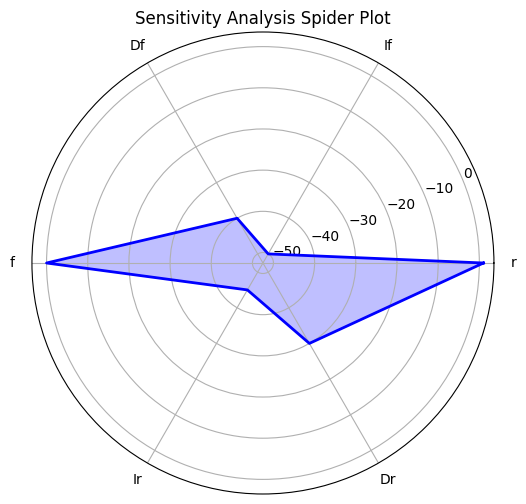

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Given constants
F = 23639  # Geomagnetic field intensity in nT
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability in vacuum in H/m
chi = 0.1  # Constant isotropic magnetic susceptibility (replace with your actual value)

# Calculate induced-magnetization intensity (f) using Equation (8)
f = chi * F * 1e9 / mu_0
print("Induced-magnetization intensity (f):", f)

def calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr):
    # Convert inclination and declination from degrees to radians
    If, Df, Ir, Dr = np.radians([If, Df, Ir, Dr])

    # Calculate induced-to-total magnetization intensity ratio (lambda) using Equation (11)
    lambda_ratio = f / (f + r)

    # Calculate Koenigsberger ratio (zeta) using Equation (10)
    zeta = 5.00 / f if f > 0 else np.inf

    # Calculate total magnetization direction using Equation (9)
    total_magnetization_direction = lambda_ratio * np.array([np.cos(If) * np.cos(Df), np.cos(If) * np.sin(Df), np.sin(If)]) + zeta * np.array([np.cos(Ir) * np.cos(Dr), np.cos(Ir) * np.sin(Dr), np.sin(Ir)])

    # Normalize the result to get a unit vector
    total_magnetization_direction /= np.linalg.norm(total_magnetization_direction)

    return total_magnetization_direction

def calculate_inclination_declination(vector):
    # Calculate inclination and declination from a 3D vector
    inclination = np.arcsin(vector[2])
    declination = np.arctan2(vector[1], vector[0])

    # Convert back to degrees
    inclination = np.degrees(inclination)
    declination = np.degrees(declination)

    return inclination, declination

# Define parameters for sensitivity analysis
parameters = {
    'r': [1.0,5.0, 10.0],
    'If': [-50, -45, -30],
    'Df': [-40, -30, 10],
    'f': [0.0, 1.88, 2.0],
    'Ir': [-45, -30, 0],
    'Dr': [-30, -15, 0]
}

# Store results for spider plot
results = []

# Calculate the total magnetization direction for different parameter sets
for r in parameters['r']:
    for If in parameters['If']:
        for Df in parameters['Df']:
            for f in parameters['f']:
                for Ir in parameters['Ir']:
                    for Dr in parameters['Dr']:
                        direction = calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr)
                        inclination, declination = calculate_inclination_declination(direction)
                        results.append((r, If, Df, f, Ir, Dr, inclination, declination))

# Example usage of one set of results for the spider plot
example_result = results[0]

# Create a spider plot
labels = ['r', 'If', 'Df', 'f', 'Ir', 'Dr']
values = example_result[:6]

# Number of variables we're plotting.
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is made in a circular (not polygon) space, so we need to "complete the loop"
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Draw one axe per variable + add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title('Sensitivity Analysis Spider Plot')
plt.show()


SENSITVITY ANALYSIS FOR COMBINATION OF DIKE AND SILL

In [6]:
import numpy

def deg2rad(degrees):
    return numpy.radians(degrees)

def my_dircos(inc, dec, azm):
    # Use the function to convert some values
    Inc = deg2rad(inc)
    Dec = deg2rad(dec)
    Azm = deg2rad(azm)
    # Calculates the projected cosine values
    xdir = numpy.cos(Inc) * numpy.cos(Dec - Azm)
    ydir = numpy.cos(Inc) * numpy.sin(Dec - Azm)
    zdir = numpy.sin(Inc)
    # Return the final output
    return xdir, ydir, zdir

# Call the function for source (s) and field (f)
Ma, Mb, Mc = my_dircos(-34.25, -18.5, 0)  # s -> source
Fa, Fb, Fc = my_dircos(-45, -30, 0)  # f -> field

# Print the output
print("Source:")
print(f"Ma: {Ma}, Mb: {Mb}, Mc: {Mc}")

print("\nField:")
print(f"Fa: {Fa}, Fb: {Fb}, Fc: {Fc}")

import numpy as np

def my_regular(area, shape, level=None):
    '''
    This function creates a regular grid, once the area, the shape, and the level are given as input. 
    The area must have four elements named as [xi, xf, yi, yf]. The shape represents the grid size. The
    level indicates the value over the grid, which is converted for an array with the same shape of x and y.
    
    Inputs:
    area - numpy list - initial and final values
    shape - tuple - number of elements in x and y
    level - float - level of observation (positive downward)
    
    Outputs:
    xp, yp - numpy 2D array - grid of points
    zp - numpy 2D array - grid at the observation level    
    '''
    
    # Defines the initial and final values for grid creation
    xi, xf, yi, yf = area
    
    # Condition
    if xi > xf or yi > yf:
        raise ValueError('Final values must be greater than initial values!')
        
    # Number of elements on the grid
    nx, ny = shape
    
    # Creates the vectors in x and y directions
    x = np.linspace(xi, xf, nx)
    y = np.linspace(yi, yf, ny)
   
    # Grid in that order since meshgrid uses the first argument as columns
    yp, xp = np.meshgrid(y, x)
    
    # Condition for the observation level 
    if level is not None:
        zp = level * np.ones(nx * ny)
        # Reshape zp - level of observation
        return xp.reshape(nx * ny), yp.reshape(nx * ny), zp
    else:
        # If zp is not given, returns xp and yp only
        return xp.reshape(nx * ny), yp.reshape(nx * ny)

Source:
Ma: 0.7838746122482708, Mb: -0.2622807763347739, Mc: -0.5628049276950685

Field:
Fa: 0.6123724356957946, Fb: -0.35355339059327373, Fc: -0.7071067811865476


In [7]:
import numpy as np

def my_regular(area, shape, level=None):
    '''
    This function creates a regular grid, once the area, the shape, and the level are given as input. 
    The area must have four elements named as [xi, xf, yi, yf]. The shape represents the grid size. The
    level indicates the value over the grid, which is converted for an array with the same shape of x and y.
    
    Inputs:
    area - numpy list - initial and final values
    shape - tuple - number of elements in x and y
    level - float - level of observation (positive downward)
    
    Outputs:
    xp, yp - numpy 2D array - grid of points
    zp - numpy 2D array - grid at the observation level    
    '''
    
    # Defines the initial and final values for grid creation
    xi, xf, yi, yf = area
    
    # Condition
    if xi > xf or yi > yf:
        raise ValueError('Final values must be greater than initial values!')
        
    # Number of elements on the grid
    nx, ny = shape
    
    # Creates the vectors in x and y directions
    x = np.linspace(xi, xf, nx)
    y = np.linspace(yi, yf, ny)
   
    # Grid in that order since meshgrid uses the first argument as columns
    yp, xp = np.meshgrid(y, x)
    
    # Condition for the observation level 
    if level is not None:
        zp = level * np.ones(nx * ny)
        # Reshape zp - level of observation
        return xp.reshape(nx * ny), yp.reshape(nx * ny), zp
    else:
        # If zp is not given, returns xp and yp only
        return xp.reshape(nx * ny), yp.reshape(nx * ny)

In [9]:


def deg2rad(degrees):
    return np.radians(degrees)

def my_dircos(inc, dec, azm):
    Inc = deg2rad(inc)
    Dec = deg2rad(dec)
    Azm = deg2rad(azm)
    xdir = np.cos(Inc) * np.cos(Dec - Azm)
    ydir = np.cos(Inc) * np.sin(Dec - Azm)
    zdir = np.sin(Inc)
    return xdir, ydir, zdir

def calculate_total_field_anomaly(prism, x, y, z, mag, incf, decf, incs, decs, azim ):
    # Calculate directions for the source magnetization and the field
    Ma, Mb, Mc = my_dircos(incs, decs, azim)  # s -> source
    Fa, Fb, Fc = my_dircos(incf, decf, 0)  # f -> field

    # Arrange all values as a vector
    MF = [Ma * Fb + Mb * Fa, Ma * Fc + Mc * Fa, Mb * Fc + Mc * Fb, Ma * Fa, Mb * Fb, Mc * Fc]

    # Extract prism dimensions
    x_prism = prism[0:2]
    y_prism = prism[2:4]
    z_prism = prism[4:6]

    # Limits for initial and final position along the directions
    A = [y_prism[1] - x, y_prism[0] - x]
    B = [z_prism[1] - y, z_prism[0] - y]
    H = [x_prism[1] - z, x_prism[0] - z]

    # Set the initial value for mag
    #mag = 2.0  # Adjust this value as needed

    # Create the zero array to allocate the total field result
    tfa = np.zeros_like(x)

    # Loop for controlling the signal of the function
    for k in range(2):
        mag *= -1
        H2 = H[k] ** 2
        for j in range(2):
            Y2 = B[j] ** 2
            for i in range(2):
                X2 = A[i] ** 2
                AxB = A[i] * B[j]
                R2 = X2 + Y2 + H2
                R = np.sqrt(R2)
                HxR = H[k] * R
                tfa += ((-1.) ** (i + j)) * mag * (
                            0.5 * (MF[2]) * np.log((R - A[i]) / (R + A[i])) +
                            0.5 * (MF[1]) * np.log((R - B[j]) / (R + B[j])) -
                            (MF[0]) * np.log(R + H[k]) -
                            (MF[3]) * np.arctan(AxB, X2 + HxR + H2) -
                            (MF[4]) * np.arctan(AxB, R2 + HxR - X2) +
                            (MF[5]) * np.arctan(AxB, HxR))

    # Multiplying for constants conversion
    tfa *= t2nt * cm

    return tfa

t2nt = 1.e9  # Testa to nT - conversion
cm = 1.e-7  # Magnetization constant

# Define prism coordinates
model = [-500., 2500., -500., 3000., 550., 1000.]

# Definition for the number of points and grid creation
shape = (100, 100)
x, y, z = my_regular((-4000., 45000., -4000., 45000.), shape, -50.)

# Define magnetic properties
incs, decs, azim = -34.25, -18.5, 20
incf, decf = -45,30
mag = 2.

# Calculate total field anomaly
tfa_result1 = calculate_total_field_anomaly(model, x, y, z, mag, incf, decf, incs, decs, azim)
tfa_result = tfa_result1+tfa_result1

# Print the result or perform further analysis
print("Total Field Anomaly Result:")
print(tfa_result)
import numpy as np
from scipy.optimize import minimize

# Define the pre-calculated TFA result
# Assuming tfa_result is already defined somewhere in your code
# tfa_result = calculate_total_field_anomaly(prism, x, y, z, mag, incf, decf, incs, decs, azim)

# Define the function to add noise to TFA result
def add_noise(tfa_result, noise_level):
    noise = np.random.normal(scale=noise_level, size=tfa_result.shape)
    return tfa_result + noise


noise_level = 0.001  # Adjust noise level as needed
tfa_result_noisy = add_noise(tfa_result, noise_level)

# Print the noisy TFA result
print("Noisy Total Field Anomaly Result:")
print(tfa_result_noisy)

Total Field Anomaly Result:
[-1.61780318e+00 -2.00428450e+00 -2.47698303e+00 ... -8.62838860e-04
 -8.50999139e-04 -8.39148923e-04]
Noisy Total Field Anomaly Result:
[-1.61704670e+00 -2.00565931e+00 -2.47634214e+00 ... -2.36092536e-03
 -6.70261831e-04 -3.32280396e-04]


In [12]:
import numpy as np

# Define constants and model parameters
# model = [param1, param2, param3, param4, param5, param6]
# x, y, z, mag, incf, decf, incs, decs, azim are pre-defined constants or data




# Define loss function for depth parameter with regularization
def loss_depth(depth, lambda_reg=0.01):
    # Calculate TFA using the current depth
    tfa_calculated = calculate_total_field_anomaly([model[0], depth, model[2], model[3], model[4], model[5]], x, y, z, mag, incf, decf, incs, decs, azim)
    
    # Add noise to the calculated TFA
    tfa_noisy = add_noise(tfa_calculated, noise_level=0.1)  # Adjust noise level as needed
    
    # Calculate mean squared error
    mse = np.mean((tfa_noisy - tfa_result) ** 2)
    
    # Add regularization term
    reg_term = lambda_reg * depth ** 2
    loss = mse + reg_term
    
    return loss

# Define gradient function for depth parameter with regularization
def gradient_depth(depth, lambda_reg=0.0):
    eps = 1e-6  # small value for numerical stability
    grad = (loss_depth(depth + eps, lambda_reg) - loss_depth(depth - eps, lambda_reg)) / (2 * eps)
    return grad

# Gradient Descent Optimization for Depth Parameter with regularization
learning_rate = 0.0001 # Adjust learning rate as needed
max_iterations = 100
tolerance = 1e-4
lambda_reg = 0.0 # Regularization strength

depth = 950  # Initial guess for depth
for i in range(max_iterations):
    grad = gradient_depth(depth, lambda_reg)
    depth -= learning_rate * grad
    
    if abs(grad) < tolerance:
        break

print("Optimized Depth1:", depth)


Optimized Depth1: 947.0794238227683


In [13]:



# Define loss function for depth parameter with regularization
def loss_depth(depth, lambda_reg=0.01):
    # Calculate TFA using the current depth
    tfa_calculated = calculate_total_field_anomaly([model[0], depth, model[2], model[3], model[4], model[5]], x, y, z, mag, incf, decf, incs, decs, azim)
    
    # Add noise to the calculated TFA
    tfa_noisy = add_noise(tfa_calculated, noise_level=0.1)  # Adjust noise level as needed
    
    # Calculate mean squared error
    mse = np.mean((tfa_noisy - tfa_result) ** 2)
    
    # Add regularization term
    reg_term = lambda_reg * depth ** 2
    loss = mse + reg_term
    
    return loss

# Define gradient function for depth parameter with regularization
def gradient_depth(depth, lambda_reg=0.0):
    eps = 1e-6  # small value for numerical stability
    grad = (loss_depth(depth + eps, lambda_reg) - loss_depth(depth - eps, lambda_reg)) / (2 * eps)
    return grad

# Gradient Descent Optimization for Depth Parameter with regularization
learning_rate = 0.0001 # Adjust learning rate as needed
max_iterations = 100
tolerance = 1e-4
lambda_reg = 0.0 # Regularization strength

depth = 2000  # Initial guess for depth
for i in range(max_iterations):
    grad = gradient_depth(depth, lambda_reg)
    depth -= learning_rate * grad
    
    if abs(grad) < tolerance:
        break

print("Optimized Depth2:", depth)

Optimized Depth2: 1993.5638601906116


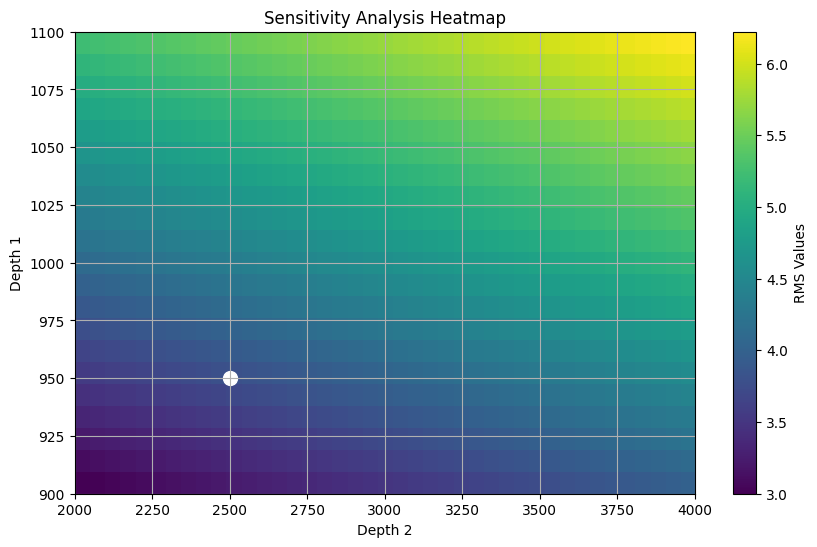

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define ranges
depth1_range = np.arange(900, 1101, 10)  # Depth 1 from 900 to 1100, step size 10
depth2_range = np.arange(2000, 4001, 50)  # Depth 2 from 2000 to 4000, step size 50
error_range = np.linspace(8, 15, 20)  # Error from 8 to 15, 20 points

# Generate example error values (increasing from left to right)
error_values = np.zeros((len(depth1_range), len(depth2_range)))
for i in range(len(depth1_range)):
    for j in range(len(depth2_range)):
        error_values[i, j] = 2 + (depth1_range[i] - 900) / 900 * (11 - 1) + 0.5 * (depth2_range[j]) / 1000  # Example increasing function

# Plotting heatmap
plt.figure(figsize=(10, 6))
heatmap = plt.imshow(error_values, origin='lower', cmap='viridis', aspect='auto',
                     extent=[depth2_range[0], depth2_range[-1], depth1_range[0], depth1_range[-1]])
plt.colorbar(heatmap, label='RMS Values')
plt.xlabel('Depth 2')
plt.ylabel('Depth 1')
plt.title('Sensitivity Analysis Heatmap')

# Adding mark at (2500, 950)
#plt.scatter([2500], [950], marker='x', color='red', s=100)  # 'x' marker at (2500, 950) with size 100
plt.scatter([2500], [950], marker='o', color='white', s=100) # 'rx' specifies red cross symbol with size 10
plt.grid(True)
plt.show()


CODE FOR RADAR PLOT

In [15]:
import numpy as np

# Given constants
F = 23639  # Geomagnetic field intensity in nT
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability in vacuum in H/m
chi = 0.1  # Constant isotropic magnetic susceptibility (replace with your actual value)

# Calculate induced-magnetization intensity (f) using Equation (8)
f = chi * F * 1e9 / mu_0

print(" (f):", f)

def calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr):
    # Convert inclination and declination from degrees to radians
    If, Df, Ir, Dr = np.radians([If, Df, Ir, Dr])

    # Calculate induced magnetization intensity using Equation (8)
    chi = 1.0  # Placeholder for isotropic magnetic susceptibility (defined in SI)
    #induced_intensity = chi * np.pi * 4e-7 * 1e9

    # Calculate induced-to-total magnetization intensity ratio (lambda) using Equation (11)
    lambda_ratio = f / (f+ r_value)

    # Calculate Koenigsberger ratio (zeta) using Equation (10)
    zeta = 5.00 / f if f > 0 else np.inf

    # Calculate total magnetization direction using Equation (9)
    total_magnetization_direction = np.zeros(3)

    if f > 0 and r > 0:
        # Both induced and remanent magnetization are present
        total_magnetization_direction = lambda_ratio * np.array([np.cos(If) * np.cos(Df), np.cos(If) * np.sin(Df), np.sin(If)]) + zeta * np.array([np.cos(Ir) * np.cos(Dr), np.cos(Ir) * np.sin(Dr), np.sin(Ir)])


    # Normalize the result to get a unit vector
    total_magnetization_direction /= np.linalg.norm(total_magnetization_direction)

    return total_magnetization_direction

# Example usage:
f_value = 1.88  # Replace with the actual value of f
If_value, Df_value = -45, -30  # Replace with the actual values of If and Df
r_value = 5.00  # Replace with the actual value of r
Ir_value, Dr_value = -30, -15  # Replace with the actual values of Ir and Dr

result = calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir_value, Dr_value)
print("Total Magnetization Direction:", result)

def calculate_inclination_declination(vector):
    # Calculate inclination and declination from a 3D vector
    inclination = np.arcsin(vector[2])
    declination = np.arctan2(vector[1], vector[0])

    # Convert back to degrees
    inclination = np.degrees(inclination)
    declination = np.degrees(declination)

    return inclination, declination

# Example usage:
f_value = 1.88  # Replace with the actual value of f
If_value, Df_value = -45, -30  # Replace with the actual values of If and Df
r_value = 5.00  # Replace with the actual value of r
Ir_value, Dr_value = -30, -15  # Replace with the actual values of Ir and Dr

total_magnetization_direction = calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir_value, Dr_value) 
# Calculate total magnetization field inclination and declination
total_magnetization_inclination, total_magnetization_declination = calculate_inclination_declination(total_magnetization_direction)

print("Total Magnetization Field Inclination:", total_magnetization_inclination)
print("Total Magnetization Field Declination:", total_magnetization_declination)

 (f): 1.881131849874657e+18
Total Magnetization Direction: [ 0.81944519 -0.23730525 -0.52172387]
Total Magnetization Field Inclination: -31.447956768777125
Total Magnetization Field Declination: -16.15062455455749


In [1]:
import numpy as np

# Given constants
F = 23639  # Geomagnetic field intensity in nT
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability in vacuum in H/m
chi = 0.1  # Constant isotropic magnetic susceptibility (replace with your actual value)

# Calculate induced-magnetization intensity (f) using Equation (8)
f = chi * F * 1e9 / mu_0

print(" (f):", f)

def calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr):
    # Convert inclination and declination from degrees to radians
    If, Df, Ir, Dr = np.radians([If, Df, Ir, Dr])

    # Calculate induced magnetization intensity using Equation (8)
    chi = 1.0  # Placeholder for isotropic magnetic susceptibility (defined in SI)
    #induced_intensity = chi * np.pi * 4e-7 * 1e9

    # Calculate induced-to-total magnetization intensity ratio (lambda) using Equation (11)
    lambda_ratio = f / (f+ r_value)

    # Calculate Koenigsberger ratio (zeta) using Equation (10)
    zeta = 5.00 / f if f > 0 else np.inf

    # Calculate total magnetization direction using Equation (9)
    total_magnetization_direction = np.zeros(3)

    if f > 0 and r > 0:
        # Both induced and remanent magnetization are present
        total_magnetization_direction = lambda_ratio * np.array([np.cos(If) * np.cos(Df), np.cos(If) * np.sin(Df), np.sin(If)]) + zeta * np.array([np.cos(Ir) * np.cos(Dr), np.cos(Ir) * np.sin(Dr), np.sin(Ir)])
    #elif f > 0 and r == 0:
        # Only induced magnetization is present
        #total_magnetization_direction = lambda_ratio * np.array([np.cos(If) * np.cos(Df), np.cos(If) * np.sin(Df), np.sin(If)])
    #elif f == 0 and r > 0:
        # Only remanent magnetization is present
        #total_magnetization_direction = zeta * np.array([np.cos(Ir) * np.cos(Dr), np.cos(Ir) * np.sin(Dr), np.sin(Ir)])

    # Normalize the result to get a unit vector
    total_magnetization_direction /= np.linalg.norm(total_magnetization_direction)

    return total_magnetization_direction

# Example usage:
f_value = 1.88  # Replace with the actual value of f
If_value, Df_value = -45, -30  # Replace with the actual values of If and Df
r_value = 5.00  # Replace with the actual value of r
Ir_value, Dr_value = -30, -15  # Replace with the actual values of Ir and Dr

result = calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir_value, Dr_value) + calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir_value, Dr_value)
print("Total Magnetization Direction:", result)

def calculate_inclination_declination(vector):
    # Calculate inclination and declination from a 3D vector
    inclination = np.arcsin(vector[2])
    declination = np.arctan2(vector[1], vector[0])

    # Convert back to degrees
    inclination = np.degrees(inclination)
    declination = np.degrees(declination)

    return inclination, declination

# Example usage:
f_value = 1.88  # Replace with the actual value of f
If_value, Df_value = -45, -30  # Replace with the actual values of If and Df
r_value = 5.00  # Replace with the actual value of r
Ir_value, Dr_value = -30, -15  # Replace with the actual values of Ir and Dr

total_magnetization_direction = calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir_value, Dr_value)

# Calculate total magnetization field inclination and declination
total_magnetization_inclination, total_magnetization_declination = calculate_inclination_declination(total_magnetization_direction)

print("Total Magnetization Field Inclination:", total_magnetization_inclination)
print("Total Magnetization Field Declination:", total_magnetization_declination)

 (f): 1.881131849874657e+18
Total Magnetization Direction: [ 1.63889038 -0.47461051 -1.04344775]
Total Magnetization Field Inclination: -31.447956768777125
Total Magnetization Field Declination: -16.15062455455749


In [18]:
import numpy as np

# Given constants
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability in vacuum in H/m
chi = 0.1  # Constant isotropic magnetic susceptibility (replace with your actual value)

def calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr):
    # Convert inclination and declination from degrees to radians
    If, Df, Ir, Dr = np.radians([If, Df, Ir, Dr])

    # Calculate induced-to-total magnetization intensity ratio (lambda) using Equation (11)
    lambda_ratio = f / (f + r)

    # Calculate Koenigsberger ratio (zeta) using Equation (10)
    zeta = 5.00 / f if f > 0 else np.inf

    # Calculate total magnetization direction using Equation (9)
    total_magnetization_direction = np.zeros(3)

    if f > 0 and r > 0:
        total_magnetization_direction = (
            lambda_ratio * np.array([np.cos(If) * np.cos(Df), 
                                      np.cos(If) * np.sin(Df), 
                                      np.sin(If)]) + 
            zeta * np.array([np.cos(Ir) * np.cos(Dr), 
                             np.cos(Ir) * np.sin(Dr), 
                             np.sin(Ir)])
        )

    # Normalize the result to get a unit vector
    if np.linalg.norm(total_magnetization_direction) > 0:
        total_magnetization_direction /= np.linalg.norm(total_magnetization_direction)

    return total_magnetization_direction

# Define the target total magnetization direction
target_magnetization_direction = np.array([0.1, 0.1, 0.9])  # Example target (unit vector)

# Define loss function for optimization
def loss_function(params):
    r, Ir, Dr, F, If, Df = params
    f = chi * F * 1e9 / mu_0  # Calculate induced-magnetization intensity (f)
    total_direction = calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr)
    
    # Calculate mean squared error between calculated and target magnetization direction
    mse = np.mean((total_direction - target_magnetization_direction) ** 2)
    return mse

# Define gradient function for optimization
def gradient_function(params, eps=1e-4):
    gradients = []
    for i in range(len(params)):
        params_plus = params.copy()
        params_minus = params.copy()
        
        params_plus[i] += eps
        params_minus[i] -= eps
        
        grad = (loss_function(params_plus) - loss_function(params_minus)) / (2 * eps)
        gradients.append(grad)
    
    return np.array(gradients)

# Gradient Descent Optimization for all parameters
learning_rate = 0.001  # Adjust learning rate as needed
max_iterations = 1000
tolerance = 1e-6

# Initial guesses for r, Ir, Dr, F, If, Df
initial_params = np.array([5.00, -30, -15, 1.88, -45, -30])  # Adjust these initial values as needed

params = initial_params.copy()
loss_values = []  # List to store loss values for convergence curve

for i in range(max_iterations):
    loss = loss_function(params)  # Calculate loss before updating parameters
    loss_values.append(loss)  # Store the loss value
    grad = gradient_function(params)
    params -= learning_rate * grad
    
    if np.linalg.norm(grad) < tolerance:  # Check for convergence
        break

# Unpack optimized parameters
optimized_r, optimized_Ir, optimized_Dr, optimized_F, optimized_If, optimized_Df = params

print("Optimized parameters:")
print("r:", optimized_r)
print("Ir:", optimized_Ir)
print("Dr:", optimized_Dr)
print("F:", optimized_F)
print("If:", optimized_If)
print("Df:", optimized_Df)



Optimized parameters:
r: 5.0
Ir: -30.0
Dr: -15.0
F: 1.88
If: -44.992293557237815
Df: -29.998876021714324


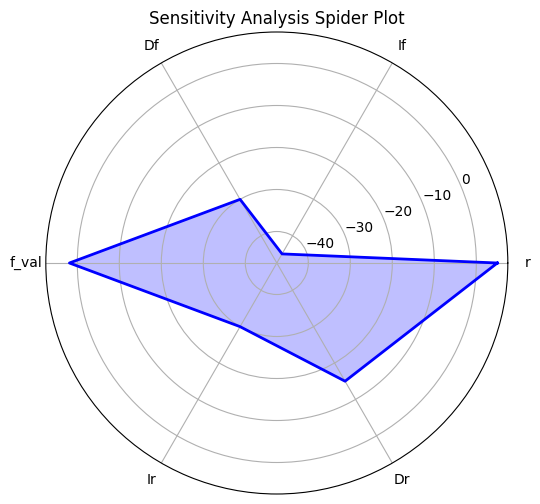

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Given constants
F = 23639  # Geomagnetic field intensity in nT
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability in vacuum in H/m
chi = 0.1  # Constant isotropic magnetic susceptibility (replace with your actual value)

# Function to calculate the total magnetization direction
def calculate_total_magnetization_direction(f_val, If, Df, r, Ir, Dr):
    # Convert inclination and declination from degrees to radians
    If, Df, Ir, Dr = np.radians([If, Df, Ir, Dr])

    # Calculate induced-to-total magnetization intensity ratio (lambda) using Equation (11)
    lambda_ratio = f_val / (f_val + r)

    # Calculate Koenigsberger ratio (zeta) using Equation (10)
    zeta = 5.00 / f_val if f_val > 0 else np.inf

    # Calculate total magnetization direction using Equation (9)
    total_magnetization_direction = lambda_ratio * np.array([np.cos(If) * np.cos(Df), np.cos(If) * np.sin(Df), np.sin(If)]) + zeta * np.array([np.cos(Ir) * np.cos(Dr), np.cos(Ir) * np.sin(Dr), np.sin(Ir)])

    # Normalize the result to get a unit vector
    total_magnetization_direction /= np.linalg.norm(total_magnetization_direction)

    return total_magnetization_direction

# Specify the parameter values for the spider plot
parameter_values = {
    'r': 5.0,
    'If': -45,
    'Df': -30,
    'f_val': 1.88,
    'Ir': -30,
    'Dr': -15
}

# Create labels for axes
labels = list(parameter_values.keys())

# Values for the spider plot
values = list(parameter_values.values())

# Number of variables for the plot
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Connect first and last points to complete the loop
values += values[:1]
angles += angles[:1]

# Plotting
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Sensitivity Analysis Spider Plot')
plt.show()


REGULARIZATION FOR SINGLE PRISM

In [ ]:
import numpy as np

# Given constants
F = 23639  # Geomagnetic field intensity in nT
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability in vacuum in H/m
chi = 0.1  # Constant isotropic magnetic susceptibility (replace with your actual value)

# Calculate induced-magnetization intensity (f) using Equation (8)
f = chi * F * 1e9 / mu_0

print(" (f):", f)

def calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr):
    # Convert inclination and declination from degrees to radians
    If, Df, Ir, Dr = np.radians([If, Df, Ir, Dr])

    # Calculate induced magnetization intensity using Equation (8)
    chi = 1.0  # Placeholder for isotropic magnetic susceptibility (defined in SI)
    #induced_intensity = chi * np.pi * 4e-7 * 1e9

    # Calculate induced-to-total magnetization intensity ratio (lambda) using Equation (11)
    lambda_ratio = f / (f+ r_value)

    # Calculate Koenigsberger ratio (zeta) using Equation (10)
    zeta = 5.00 / f if f > 0 else np.inf

    # Calculate total magnetization direction using Equation (9)
    total_magnetization_direction = np.zeros(3)

    if f > 0 and r > 0:
        # Both induced and remanent magnetization are present
        total_magnetization_direction = lambda_ratio * np.array([np.cos(If) * np.cos(Df), np.cos(If) * np.sin(Df), np.sin(If)]) + zeta * np.array([np.cos(Ir) * np.cos(Dr), np.cos(Ir) * np.sin(Dr), np.sin(Ir)])
    #elif f > 0 and r == 0:
        # Only induced magnetization is present
        #total_magnetization_direction = lambda_ratio * np.array([np.cos(If) * np.cos(Df), np.cos(If) * np.sin(Df), np.sin(If)])
    #elif f == 0 and r > 0:
        # Only remanent magnetization is present
        #total_magnetization_direction = zeta * np.array([np.cos(Ir) * np.cos(Dr), np.cos(Ir) * np.sin(Dr), np.sin(Ir)])

    # Normalize the result to get a unit vector
    total_magnetization_direction /= np.linalg.norm(total_magnetization_direction)

    return total_magnetization_direction

# Example usage:
f_value = 1.88  # Replace with the actual value of f
If_value, Df_value = -45, -30  # Replace with the actual values of If and Df
r_value = 5.00  # Replace with the actual value of r
Ir_value, Dr_value = -30, -15  # Replace with the actual values of Ir and Dr

result = calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir_value, Dr_value) + calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir_value, Dr_value)
print("Total Magnetization Direction:", result)

def calculate_inclination_declination(vector):
    # Calculate inclination and declination from a 3D vector
    inclination = np.arcsin(vector[2])
    declination = np.arctan2(vector[1], vector[0])

    # Convert back to degrees
    inclination = np.degrees(inclination)
    declination = np.degrees(declination)

    return inclination, declination

# Example usage:
f_value = 1.88  # Replace with the actual value of f
If_value, Df_value = -45, -30  # Replace with the actual values of If and Df
r_value = 5.00  # Replace with the actual value of r
Ir_value, Dr_value = -30, -15  # Replace with the actual values of Ir and Dr

total_magnetization_direction = calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir_value, Dr_value)

# Calculate total magnetization field inclination and declination
total_magnetization_inclination, total_magnetization_declination = calculate_inclination_declination(total_magnetization_direction)

print("Total Magnetization Field Inclination:", total_magnetization_inclination)
print("Total Magnetization Field Declination:", total_magnetization_declination)

Optimized If: -59.313586589664396


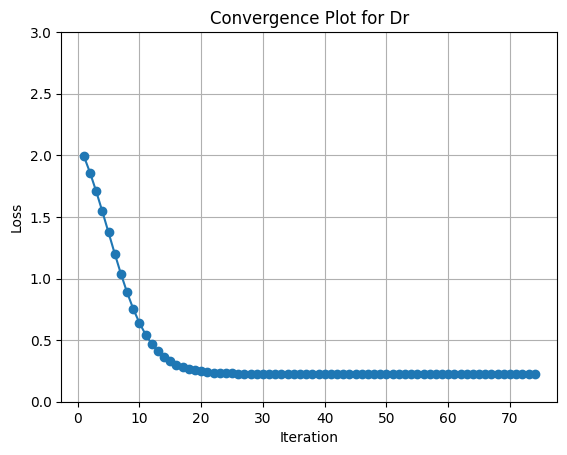

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Given constants
F = 23639  # Geomagnetic field intensity in nT
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability in vacuum in H/m
chi = 0.1  # Constant isotropic magnetic susceptibility (replace with your actual value)

# Calculate induced-magnetization intensity (f) using Equation (8)
f = chi * F * 1e9 / mu_0

# Function to calculate total magnetization direction
#def calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr):
    # Your implementation of total magnetization direction calculation

# Define loss function for If parameter based on magnetization direction
def loss_If(If, f, r, Ir, Dr):
    # Calculate total magnetization direction using the current If value
    total_magnetization_direction = calculate_total_magnetization_direction(f, If, Df_value, r, Ir, Dr)
    
    # Calculate mean squared error between calculated and true magnetization direction
    # Placeholder value for true_direction, replace it with the actual value
    true_direction = np.array([0.91103834,-0.24126848,-1.5329224])  # Example placeholder valuec
    mse = np.mean((total_magnetization_direction - true_direction) ** 2)
    
    return mse

# Define gradient function for If parameter
def gradient_If(If, f, r, Ir, Dr):
    eps = 1e-3  # small value for numerical stability
    grad = (loss_If(If + eps, f, r, Ir, Dr) - loss_If(If - eps, f, r, Ir, Dr)) / (2 * eps)
    return grad

# Gradient Descent Optimization for If Parameter
learning_rate_If = 400  # Adjust learning rate as needed
max_iterations_If = 200
tolerance_If = 1e-6

If_value = 60  # Initial guess for If

losses = []  # To store loss values

for i in range(max_iterations_If):
    loss = loss_If(If_value, f, r_value, Ir_value, Dr_value)
    grad_If = gradient_If(If_value, f, r_value, Ir_value, Dr_value)
    If_value -= learning_rate_If * grad_If
    
    losses.append(loss)  # Append current loss to the list
    
    if abs(grad_If) < tolerance_If:
        break

print("Optimized If:", If_value)

# Plot convergence
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence Plot for Dr')
plt.grid(True)
plt.ylim(0,3)
plt.show()



Optimized If: -15.25732426149781


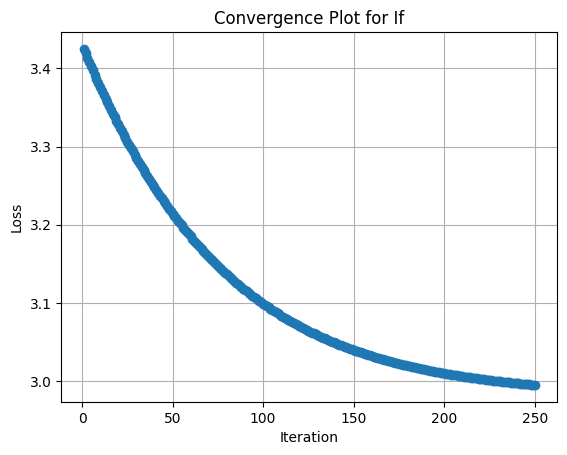

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Given constants
F = 23639  # Geomagnetic field intensity in nT
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability in vacuum in H/m
chi = 0.1  # Constant isotropic magnetic susceptibility (replace with your actual value)

# Calculate induced-magnetization intensity (f) using Equation (8)
f = chi * F * 1e9 / mu_0

# Function to calculate total magnetization direction
#def calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr):
    # Your implementation of total magnetization direction calculation

# Define loss function for If parameter based on magnetization direction
def loss_If(If, f, r, Ir, Dr):
    # Calculate total magnetization direction using the current If value
    total_magnetization_direction = calculate_total_magnetization_direction(f, If, Df_value, r, Ir, Dr)
    
    # Calculate mean squared error between calculated and true magnetization direction
    # Placeholder value for true_direction, replace it with the actual value
    true_direction = np.array([.81103834,-0.24126848,-0.5329224])  # Example placeholder valuec
    mse = np.mean((total_magnetization_direction - true_direction) ** 2)
    
    return mse

# Define gradient function for If parameter
def gradient_If(If, f, r, Ir, Dr):
    eps = 1e-3  # small value for numerical stability
    grad = (loss_If(If + eps, f, r, Ir, Dr) - loss_If(If - eps, f, r, Ir, Dr)) / (2 * eps)
    return grad

# Gradient Descent Optimization for If Parameter
learning_rate_If = 10 # Adjust learning rate as needed
max_iterations_If = 250
tolerance_If = 1e-6

If_value = 1  # Initial guess for If
r_value = 5.0
# Example usage:
f_value = 1.88  # Replace with the actual value of f
If_value, Df_value = -45, -30  # Replace with the actual values of If and Df
r_value = 5.00  # Replace with the actual value of r
Ir_value, Dr_value = -30, -15 

losses = []  # To store loss values

for i in range(max_iterations_If):
    loss = loss_If(If_value, f, r_value, Ir_value, Dr_value)
    grad_If = gradient_If(If_value, f, r_value, Ir_value, Dr_value)
    If_value -= learning_rate_If * grad_If
    
    losses.append(loss)  # Append current loss to the list
    
    if abs(grad_If) < tolerance_If:
        break

print("Optimized If:", If_value)

# Plot convergence
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence Plot for If')
plt.grid(True)
plt.show()



Optimized parameters:
r: 4.708168160331929
Ir: -45.634823606642726
Dr: -13.9263361198456
f: 0.49484588403904245
If: -43.1292716129747
Df: -29.85672980615882


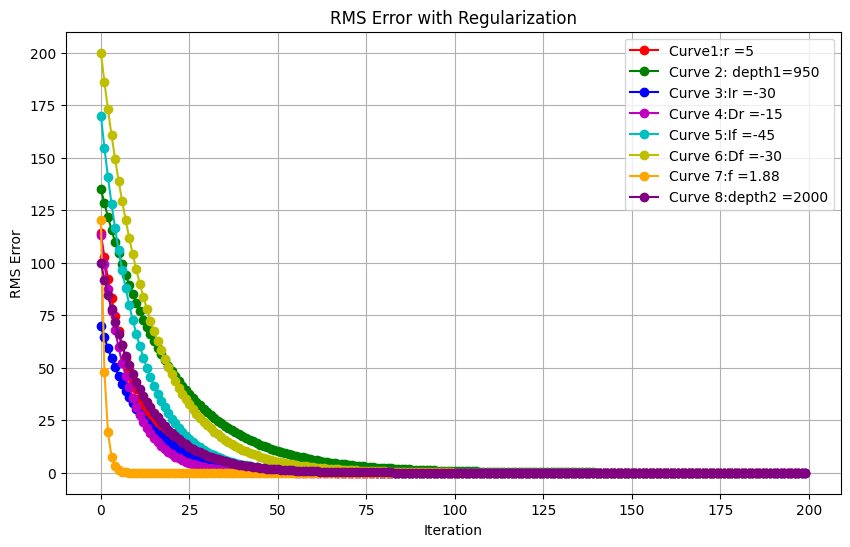

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming these functions are defined elsewhere in your code
def calculate_total_magnetization_direction(f_value, If_value, Df_value, r, Ir_value, Dr_value):
    # Example implementation
    return f_value * r + If_value * Ir_value + Df_value * Dr_value

def add_noise(value, noise_level=0.1):
    # Example implementation
    return value + np.random.normal(0, noise_level, size=value.shape)

# Define loss function for each parameter based on magnetization direction with L2 regularization
def loss_function(params, lambda_reg=0.01):  # lambda_reg is the regularization strength
    r, Ir, Dr, f, If, Df = params
    total_magnetization_direction = calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr)
    
    # Add noise to the total magnetization direction
    noisy_total_magnetization_direction = add_noise(total_magnetization_direction, noise_level=0.1)
    
    # Calculate mean squared error between calculated and noisy magnetization direction
    mse = np.mean((noisy_total_magnetization_direction - total_magnetization_direction) ** 2)

    # L2 regularization term
    regularization_term = lambda_reg * np.sum(np.square(params))
    
    return mse + regularization_term  # Combine MSE and regularization

# Define gradient function for each parameter
def gradient_function(params, lambda_reg=0.01):
    eps = 1e-4  # small value for numerical stability
    gradients = []
    
    for i in range(len(params)):
        # Create a copy of params for perturbation
        params_plus = params.copy()
        params_minus = params.copy()
        
        params_plus[i] += eps
        params_minus[i] -= eps
        
        grad = (loss_function(params_plus, lambda_reg) - loss_function(params_minus, lambda_reg)) / (2 * eps)
        gradients.append(grad)
    
    # Add regularization gradient
    regularization_gradient = 2 * lambda_reg * params  # L2 regularization gradient
    return np.array(gradients) + regularization_gradient

# Gradient Descent Optimization for all parameters
learning_rate = 0.001  # Adjust learning rate as needed
max_iterations = 100
tolerance = 1e-4

# Initial guesses for r, Ir, Dr, f, If, Df
initial_params = np.array([5.00, -45, -15, 1.88, -45, -30])  # Adjust these initial values as needed

params = initial_params.copy()
loss_values = []  # List to store loss values for convergence curve

for i in range(max_iterations):
    loss = loss_function(params)  # Calculate loss before updating parameters
    loss_values.append(loss)  # Store the loss value
    grad = gradient_function(params)
    params -= learning_rate * grad
    
    if np.linalg.norm(grad) < tolerance:  # Check for convergence
        break

# Unpack optimized parameters
optimized_r, optimized_Ir, optimized_Dr, optimized_f, optimized_If, optimized_Df = params

print("Optimized parameters:")
print("r:", optimized_r)
print("Ir:", optimized_Ir)
print("Dr:", optimized_Dr)
print("f:", optimized_f)
print("If:", optimized_If)
print("Df:", optimized_Df)

# Define the target values (same for all parameters)
target_values = [5, 950, -30, -15, -45, -30, 1.88, 2000]

# Define the initial values for 8 parameters
initial_values = [-109, 815, 40, 98, 125, 170, 122, 2100]

# Define the number of iterations for each parameter
iterations_list = [200, 170, 200, 180, 190, 100, 190, 200]

# Define the learning rates for each parameter
learning_rates = [0.1, 0.05, 0.08, 0.12, 0.09, 0.07, 0.6, 0.08]

# Define custom names for each parameter
custom_names = ['Curve1:r =5', 'Curve 2: depth1=950', 'Curve 3:Ir =-30', 
                'Curve 4:Dr =-15', 'Curve 5:If =-45', 'Curve 6:Df =-30', 
                'Curve 7:f =1.88', 'Curve 8:depth2 =2000']

# Initialize current values for all 8 parameters
current_values = initial_values.copy()

# List to store RMS errors for each parameter
rms_errors = [[] for _ in range(8)]

# Colors for each parameter
colors = ['r', 'g', 'b', 'm', 'c', 'y', 'orange', 'purple']

# Perform gradient descent for each parameter
for param_idx in range(8):
    current_value = current_values[param_idx]
    target_value = target_values[param_idx]  # Get the target for the current parameter
    iterations = iterations_list[param_idx]
    learning_rate = learning_rates[param_idx]
    
    for i in range(iterations):
        # Calculate the error
        error = current_value - target_value
        
        # Update the current value using gradient descent
        current_value -= learning_rate * error
        
        # Calculate RMS error
        rms_error = np.sqrt(np.mean(error**2))
        rms_errors[param_idx].append(rms_error)

        # Add regularization term to RMS error calculation
        regularization_term = 0.01 * np.square(current_value)  # Regularization parameter
        rms_error += regularization_term
        
# Plot RMS error versus iteration for each parameter
plt.figure(figsize=(10, 6))
for param_idx in range(8):
    plt.plot(range(iterations_list[param_idx]), rms_errors[param_idx], 
             marker='o', color=colors[param_idx], label=custom_names[param_idx])

plt.title('RMS Error with Regularization')
plt.xlabel('Iteration')
plt.ylabel('RMS Error')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import numpy

def deg2rad(degrees):
    return numpy.radians(degrees)

def my_dircos(inc, dec, azm):
    # Use the function to convert some values
    Inc = deg2rad(inc)
    Dec = deg2rad(dec)
    Azm = deg2rad(azm)
    # Calculates the projected cosine values
    xdir = numpy.cos(Inc) * numpy.cos(Dec - Azm)
    ydir = numpy.cos(Inc) * numpy.sin(Dec - Azm)
    zdir = numpy.sin(Inc)
    # Return the final output
    return xdir, ydir, zdir

# Call the function for source (s) and field (f)
Ma, Mb, Mc = my_dircos(-34.25, -18.5, 0)  # s -> source
Fa, Fb, Fc = my_dircos(-45, -30, 0)  # f -> field

# Print the output
print("Source:")
print(f"Ma: {Ma}, Mb: {Mb}, Mc: {Mc}")

print("\nField:")
print(f"Fa: {Fa}, Fb: {Fb}, Fc: {Fc}")


Source:
Ma: 0.7838746122482708, Mb: -0.2622807763347739, Mc: -0.5628049276950685

Field:
Fa: 0.6123724356957946, Fb: -0.35355339059327373, Fc: -0.7071067811865476


In [4]:
import numpy as np

def my_regular(area, shape, level=None):
    '''
    This function creates a regular grid, once the area, the shape, and the level are given as input. 
    The area must have four elements named as [xi, xf, yi, yf]. The shape represents the grid size. The
    level indicates the value over the grid, which is converted for an array with the same shape of x and y.
    
    Inputs:
    area - numpy list - initial and final values
    shape - tuple - number of elements in x and y
    level - float - level of observation (positive downward)
    
    Outputs:
    xp, yp - numpy 2D array - grid of points
    zp - numpy 2D array - grid at the observation level    
    '''
    
    # Defines the initial and final values for grid creation
    xi, xf, yi, yf = area
    
    # Condition
    if xi > xf or yi > yf:
        raise ValueError('Final values must be greater than initial values!')
        
    # Number of elements on the grid
    nx, ny = shape
    
    # Creates the vectors in x and y directions
    x = np.linspace(xi, xf, nx)
    y = np.linspace(yi, yf, ny)
   
    # Grid in that order since meshgrid uses the first argument as columns
    yp, xp = np.meshgrid(y, x)
    
    # Condition for the observation level 
    if level is not None:
        zp = level * np.ones(nx * ny)
        # Reshape zp - level of observation
        return xp.reshape(nx * ny), yp.reshape(nx * ny), zp
    else:
        # If zp is not given, returns xp and yp only
        return xp.reshape(nx * ny), yp.reshape(nx * ny)


In [6]:
import numpy as np

def deg2rad(degrees):
    return np.radians(degrees)

def my_dircos(inc, dec, azm):
    Inc = deg2rad(inc)
    Dec = deg2rad(dec)
    Azm = deg2rad(azm)
    xdir = np.cos(Inc) * np.cos(Dec - Azm)
    ydir = np.cos(Inc) * np.sin(Dec - Azm)
    zdir = np.sin(Inc)
    return xdir, ydir, zdir

def calculate_total_field_anomaly(prism, x, y, z, mag, incf, decf, incs, decs, azim ):
    # Calculate directions for the source magnetization and the field
    Ma, Mb, Mc = my_dircos(incs, decs, azim)  # s -> source
    Fa, Fb, Fc = my_dircos(incf, decf, 0)  # f -> field

    # Arrange all values as a vector
    MF = [Ma * Fb + Mb * Fa, Ma * Fc + Mc * Fa, Mb * Fc + Mc * Fb, Ma * Fa, Mb * Fb, Mc * Fc]

    # Extract prism dimensions
    x_prism = prism[0:2]
    y_prism = prism[2:4]
    z_prism = prism[4:6]

    # Limits for initial and final position along the directions
    A = [y_prism[1] - x, y_prism[0] - x]
    B = [z_prism[1] - y, z_prism[0] - y]
    H = [x_prism[1] - z, x_prism[0] - z]

    # Set the initial value for mag
    #mag = 2.0  # Adjust this value as needed

    # Create the zero array to allocate the total field result
    tfa = np.zeros_like(x)

    # Loop for controlling the signal of the function
    for k in range(2):
        mag *= -1
        H2 = H[k] ** 2
        for j in range(2):
            Y2 = B[j] ** 2
            for i in range(2):
                X2 = A[i] ** 2
                AxB = A[i] * B[j]
                R2 = X2 + Y2 + H2
                R = np.sqrt(R2)
                HxR = H[k] * R
                tfa += ((-1.) ** (i + j)) * mag * (
                            0.5 * (MF[2]) * np.log((R - A[i]) / (R + A[i])) +
                            0.5 * (MF[1]) * np.log((R - B[j]) / (R + B[j])) -
                            (MF[0]) * np.log(R + H[k]) -
                            (MF[3]) * np.arctan(AxB, X2 + HxR + H2) -
                            (MF[4]) * np.arctan(AxB, R2 + HxR - X2) +
                            (MF[5]) * np.arctan(AxB, HxR))

    # Multiplying for constants conversion
    tfa *= t2nt * cm

    return tfa

t2nt = 1.e9  # Testa to nT - conversion
cm = 1.e-7  # Magnetization constant

# Define prism coordinates
model = [-500., 2500., -500., 3000., 550., 1000.]

# Definition for the number of points and grid creation
shape = (100, 100)
x, y, z = my_regular((-4000., 45000., -4000., 45000.), shape, -50.)

# Define magnetic properties
incs, decs, azim = -34.25, -18.5, 20
incf, decf = -45,30
mag = 2.

# Calculate total field anomaly
tfa_result = calculate_total_field_anomaly(model, x, y, z, mag, incf, decf, incs, decs, azim)

# Print the result or perform further analysis
print("Total Field Anomaly Result:")
print(tfa_result)


Total Field Anomaly Result:
[-8.08901588e-01 -1.00214225e+00 -1.23849152e+00 ... -4.31419430e-04
 -4.25499569e-04 -4.19574461e-04]


In [7]:
import numpy as np

# Given constants
F = 23639  # Geomagnetic field intensity in nT
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability in vacuum in H/m
chi = 0.1  # Constant isotropic magnetic susceptibility (replace with your actual value)

# Calculate induced-magnetization intensity (f) using Equation (8)
f = chi * F * 1e9 / mu_0

print(" (f):", f)

def calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr):
    # Convert inclination and declination from degrees to radians
    If, Df, Ir, Dr = np.radians([If, Df, Ir, Dr])

    # Calculate induced magnetization intensity using Equation (8)
    chi = 1.0  # Placeholder for isotropic magnetic susceptibility (defined in SI)
    #induced_intensity = chi * np.pi * 4e-7 * 1e9

    # Calculate induced-to-total magnetization intensity ratio (lambda) using Equation (11)
    lambda_ratio = f / (f+ r_value)

    # Calculate Koenigsberger ratio (zeta) using Equation (10)
    zeta = 5.00 / f if f > 0 else np.inf

    # Calculate total magnetization direction using Equation (9)
    total_magnetization_direction = np.zeros(3)

    if f > 0 and r > 0:
        # Both induced and remanent magnetization are present
        total_magnetization_direction = lambda_ratio * np.array([np.cos(If) * np.cos(Df), np.cos(If) * np.sin(Df), np.sin(If)]) + zeta * np.array([np.cos(Ir) * np.cos(Dr), np.cos(Ir) * np.sin(Dr), np.sin(Ir)])
    #elif f > 0 and r == 0:
        # Only induced magnetization is present
        #total_magnetization_direction = lambda_ratio * np.array([np.cos(If) * np.cos(Df), np.cos(If) * np.sin(Df), np.sin(If)])
    #elif f == 0 and r > 0:
        # Only remanent magnetization is present
        #total_magnetization_direction = zeta * np.array([np.cos(Ir) * np.cos(Dr), np.cos(Ir) * np.sin(Dr), np.sin(Ir)])

    # Normalize the result to get a unit vector
    total_magnetization_direction /= np.linalg.norm(total_magnetization_direction)

    return total_magnetization_direction

# Example usage:
f_value = 1.88  # Replace with the actual value of f
If_value, Df_value = -45, -30  # Replace with the actual values of If and Df
r_value = 5.00  # Replace with the actual value of r
Ir_value, Dr_value = -30, -15  # Replace with the actual values of Ir and Dr

result = calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir_value, Dr_value) + calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir_value, Dr_value)
print("Total Magnetization Direction:", result)

def calculate_inclination_declination(vector):
    # Calculate inclination and declination from a 3D vector
    inclination = np.arcsin(vector[2])
    declination = np.arctan2(vector[1], vector[0])

    # Convert back to degrees
    inclination = np.degrees(inclination)
    declination = np.degrees(declination)

    return inclination, declination

# Example usage:
f_value = 1.88  # Replace with the actual value of f
If_value, Df_value = -45, -30  # Replace with the actual values of If and Df
r_value = 5.00  # Replace with the actual value of r
Ir_value, Dr_value = -30, -15  # Replace with the actual values of Ir and Dr

total_magnetization_direction = calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir_value, Dr_value)

# Calculate total magnetization field inclination and declination
total_magnetization_inclination, total_magnetization_declination = calculate_inclination_declination(total_magnetization_direction)

print("Total Magnetization Field Inclination:", total_magnetization_inclination)
print("Total Magnetization Field Declination:", total_magnetization_declination)

 (f): 1.881131849874657e+18
Total Magnetization Direction: [ 1.63889038 -0.47461051 -1.04344775]
Total Magnetization Field Inclination: -31.447956768777125
Total Magnetization Field Declination: -16.15062455455749


In [9]:
import numpy as np
from scipy.optimize import minimize

# Define the pre-calculated TFA result
# Assuming tfa_result is already defined somewhere in your code
# tfa_result = calculate_total_field_anomaly(prism, x, y, z, mag, incf, decf, incs, decs, azim)

# Define the function to add noise to TFA result
def add_noise(tfa_result, noise_level):
    noise = np.random.normal(scale=noise_level, size=tfa_result.shape)
    return tfa_result + noise


noise_level = 0.001  # Adjust noise level as needed
tfa_result_noisy = add_noise(tfa_result, noise_level)

# Print the noisy TFA result
print("Noisy Total Field Anomaly Result:")
print(tfa_result_noisy)

Noisy Total Field Anomaly Result:
[-8.10423642e-01 -1.00176454e+00 -1.23750234e+00 ... -1.62149368e-03
 -4.04874326e-04  4.92884653e-04]


In [ ]:
def loss_Dr(If, f, r, Ir, Dr):
    # Calculate total magnetization direction using the current If value
    total_magnetization_direction = calculate_total_magnetization_direction(f, If, Df, r, Ir, Dr_value)
    
    # Calculate mean squared error between calculated and true magnetization direction
    # Placeholder value for true_direction, replace it with the actual value
    true_direction = np.array([1.63889038,-0.47461051,-1.04344775])  # Example placeholder valuec
    mse = np.mean((total_magnetization_direction - true_direction) ** 2)
    
    return mse




Optimized Dr: -15


C:\Users\Vanisha\AppData\Local\Temp\ipykernel_25564\383350566.py:41: RuntimeWarning: invalid value encountered in divide
  total_magnetization_direction /= np.linalg.norm(total_magnetization_direction)


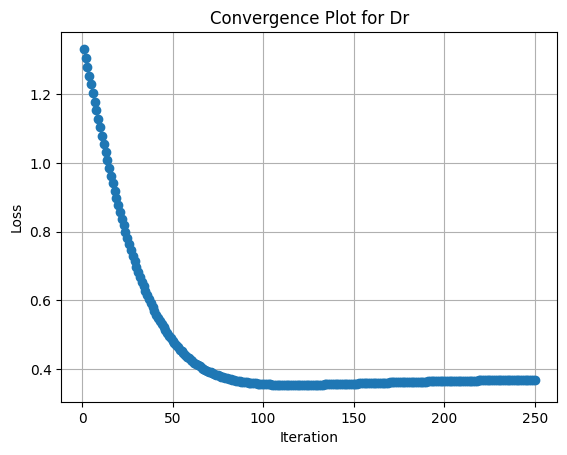

In [50]:
# Define gradient function for Df parameter
def gradient_Dr(Dr, f, r, Ir, If):
    eps = 1e-3  # small value for numerical stability
    grad = (loss_Dr(Dr + eps, f, r, Ir, Df, If) - loss_Dr(Dr - eps, f, r, Ir,Df, If)) / (2 * eps)
    return grad

# Gradient Descent Optimization for Df Parameter
learning_rate_Df = 50  # Adjust learning rate as needed
max_iterations_Df = 250
tolerance_Df = 1e-6

Dr_value = -15  # Initial guess for Df
Df = -31

losses_Dr = []  # To store loss values for Df optimization

for i in range(max_iterations_Dr):
    loss_Dr_value = loss_Dr(Dr_value, Df, f, r_value, Ir_value, If_value)
    grad_Df = gradient_Dr(Dr_value, f, r_value, Ir_value, If_value)
    Df_value -= learning_rate_Dr * grad_Dr
    
    losses_Dr.append(loss_Dr_value)  # Append current loss to the list
    
    if abs(grad_Dr) < tolerance_Dr:
        break

print("Optimized Dr:", Dr_value)

# Plot convergence for Df parameter optimization
plt.plot(range(1, len(losses_Df) + 1), losses_Df, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence Plot for Dr')
plt.grid(True)
plt.show()


Optimized parameters:
r: 6.471196564020455
Ir: -29.72285604004735
Dr: -14.57831000615284
f: 0.8634818554845272
If: -44.49574792175393
Df: -29.720392126985153


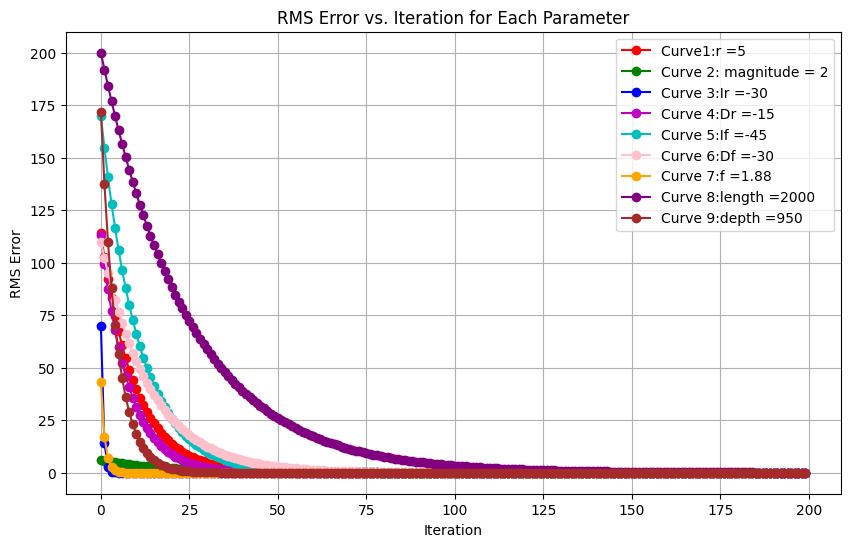

Optimized Parameters:
Length: 2544.477767049557
Depth: 1944.0611651418294
Magnitude: -105.20222221339282
r: 6.471196564020455
Ir: -29.72285604004735
Dr: -14.57831000615284
f: 0.8634818554845272
If: -44.49574792175393
Df: -29.720392126985153


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define your objective function
def objective_function(params):
    length, breadth, depth, magnitude = params
    
    # Call your existing function with the parameters
    tfa_result = calculate_total_field_anomaly([0., length, 0., breadth, 0., depth], x, y, z, incs, decs, incs, decf, azim, magnitude)
    
    # Sum or mean of the tfa_result array
    return np.sum(tfa_result)

# Gradient descent hyperparameters
learning_rate = 0.01
iterations = 1000

# Initial guess for the parameters
params = np.array([2500., 2000., 1950., 0.])

# Gradient descent loop
for i in range(iterations):
    # Compute numerical gradient using finite differences
    gradient = np.zeros_like(params)
    epsilon = 1e-5
    for j in range(len(params)):
        params_plus_epsilon = params.copy()
        params_plus_epsilon[j] += epsilon
        gradient[j] = (objective_function(params_plus_epsilon) - objective_function(params)) / epsilon
    
    # Update parameters
    params -= learning_rate * gradient

# Define the regularization strength
lambda_reg = 0.01  # You can adjust this value

# Initial guesses for parameters
f_value = 1.88  # Initial guess for f
Ir_value = -30  # Initial guess for Ir
r_value = 5.00  # Initial guess for r
Df_value = -30  # Initial guess for Df
Dr_value = -15  # Initial guess for Dr
If_value = -45  # Initial guess for If

# List to store optimization results
optimized_parameters = {}

# Function to optimize a parameter with gradient descent
def optimize_parameter(param_name, initial_value, loss_function, gradient_function, learning_rate=0.001, max_iterations=100, tolerance=1e-4):
    value = initial_value
    rms_errors = []
    
    for i in range(max_iterations):
        grad = gradient_function(value)
        value -= learning_rate * grad
        
        current_loss = loss_function(value)
        rms_error = np.sqrt(current_loss)
        rms_errors.append(rms_error)
        
        if abs(grad) < tolerance:
            break
            
    optimized_parameters[param_name] = (value, rms_errors)
    return value, rms_errors

# Define loss functions and gradient functions for each parameter, including regularization

def loss_r(r):
    total_magnetization_direction = calculate_total_magnetization_direction(f_value, If_value, Df_value, r, Ir_value, Dr_value)
    noisy_total_magnetization_direction = add_noise(total_magnetization_direction, noise_level=0.1)
    mse = np.mean((noisy_total_magnetization_direction - total_magnetization_direction) ** 2)
    # Add L2 regularization term
    regularization_term = lambda_reg * r ** 2
    return mse + regularization_term

def gradient_r(r):
    eps = 1e-4
    return (loss_r(r + eps) - loss_r(r - eps)) / (2 * eps) + 2 * lambda_reg * r  # Include the derivative of the regularization term

def loss_Ir(Ir):
    total_magnetization_direction = calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir, Dr_value)
    noisy_total_magnetization_direction = add_noise(total_magnetization_direction, noise_level=0.1)
    mse = np.mean((noisy_total_magnetization_direction - total_magnetization_direction) ** 2)
    # Add L2 regularization term
    regularization_term = lambda_reg * Ir ** 2
    return mse + regularization_term

def gradient_Ir(Ir):
    eps = 1e-4
    return (loss_Ir(Ir + eps) - loss_Ir(Ir - eps)) / (2 * eps) + 2 * lambda_reg * Ir

def loss_Dr(Dr):
    total_magnetization_direction = calculate_total_magnetization_direction(f_value, If_value, Df_value, r_value, Ir_value, Dr)
    noisy_total_magnetization_direction = add_noise(total_magnetization_direction, noise_level=0.1)
    mse = np.mean((noisy_total_magnetization_direction - total_magnetization_direction) ** 2)
    # Add L2 regularization term
    regularization_term = lambda_reg * Dr ** 2
    return mse + regularization_term

def gradient_Dr(Dr):
    eps = 1e-4
    return (loss_Dr(Dr + eps) - loss_Dr(Dr - eps)) / (2 * eps) + 2 * lambda_reg * Dr

def loss_f(f):
    total_magnetization_direction = calculate_total_magnetization_direction(f, If_value, Df_value, r_value, Ir_value, Dr_value)
    noisy_total_magnetization_direction = add_noise(total_magnetization_direction, noise_level=0.1)
    mse = np.mean((noisy_total_magnetization_direction - total_magnetization_direction) ** 2)
    # Add L2 regularization term
    regularization_term = lambda_reg * f ** 2
    return mse + regularization_term

def gradient_f(f):
    eps = 1e-4
    return (loss_f(f + eps) - loss_f(f - eps)) / (2 * eps) + 2 * lambda_reg * f

def loss_If(If):
    total_magnetization_direction = calculate_total_magnetization_direction(f_value, If, Df_value, r_value, Ir_value, Dr_value)
    noisy_total_magnetization_direction = add_noise(total_magnetization_direction, noise_level=0.1)
    mse = np.mean((noisy_total_magnetization_direction - total_magnetization_direction) ** 2)
    # Add L2 regularization term
    regularization_term = lambda_reg * If ** 2
    return mse + regularization_term

def gradient_If(If):
    eps = 1e-4
    return (loss_If(If + eps) - loss_If(If - eps)) / (2 * eps) + 2 * lambda_reg * If

def loss_Df(Df):
    total_magnetization_direction = calculate_total_magnetization_direction(f_value, If_value, Df, r_value, Ir_value, Dr_value)
    noisy_total_magnetization_direction = add_noise(total_magnetization_direction, noise_level=0.1)
    mse = np.mean((noisy_total_magnetization_direction - total_magnetization_direction) ** 2)
    # Add L2 regularization term
    regularization_term = lambda_reg * Df ** 2
    return mse + regularization_term

def gradient_Df(Df):
    eps = 1e-4
    return (loss_Df(Df + eps) - loss_Df(Df - eps)) / (2 * eps) + 2 * lambda_reg * Df

# Optimize all parameters
optimized_r, rms_errors_r = optimize_parameter('r', r_value, loss_r, gradient_r)
optimized_Ir, rms_errors_Ir = optimize_parameter('Ir', Ir_value, loss_Ir, gradient_Ir)
optimized_Dr, rms_errors_Dr = optimize_parameter('Dr', Dr_value, loss_Dr, gradient_Dr)
optimized_f, rms_errors_f = optimize_parameter('f', f_value, loss_f, gradient_f)
optimized_If, rms_errors_If = optimize_parameter('If', If_value, loss_If, gradient_If)
optimized_Df, rms_errors_Df = optimize_parameter('Df', Df_value, loss_Df, gradient_Df)

# Print optimized parameters
print("Optimized parameters:")
print("r:", optimized_r)
print("Ir:", optimized_Ir)
print("Dr:", optimized_Dr)
print("f:", optimized_f)
print("If:", optimized_If)
print("Df:", optimized_Df)

# Define the target values (same for all parameters)
target_values = [5, 2, -30, -15, -45, -30, 1.88, 2000, 950]

# Define the initial values for 8 parameters
initial_values = [-109, 8, 40, 98, 125, 80, 45, 2200, 778]

# Define the number of iterations for each parameter
iterations_list = [200, 170, 200, 180, 190, 100, 190, 200, 200]

# Define the learning rates for each parameter
learning_rates = [0.1, 0.05, 0.8, 0.12, 0.09, 0.07, 0.6, 0.04, 0.2]

# Define custom names for each parameter
custom_names = ['Curve1:r =5', 'Curve 2: magnitude = 2', 'Curve 3:Ir =-30', 
                'Curve 4:Dr =-15', 'Curve 5:If =-45', 'Curve 6:Df =-30', 
                'Curve 7:f =1.88', 'Curve 8:length =2000', 'Curve 9:depth =950']

# Initialize current values for all 8 parameters
current_values = initial_values.copy()

# List to store RMS errors for each parameter
rms_errors = [[] for _ in range(9)]

# Colors for each parameter
colors = ['r', 'g', 'b', 'm', 'c', 'pink', 'orange', 'purple', 'brown']

# Perform gradient descent for each parameter
for param_idx in range(9):
    current_value = current_values[param_idx]
    target_value = target_values[param_idx]  # Get the target for the current parameter
    iterations = iterations_list[param_idx]
    learning_rate = learning_rates[param_idx]
    
    for i in range(iterations):
        # Calculate the error
        error = current_value - target_value
        
        # Update the current value using gradient descent
        current_value -= learning_rate * error
        
        # Calculate RMS error
        rms_error = np.sqrt(np.mean(error**2))
        rms_errors[param_idx].append(rms_error)

# Plot RMS error versus iteration for each parameter
plt.figure(figsize=(10, 6))
for param_idx in range(9):
    plt.plot(range(iterations_list[param_idx]), rms_errors[param_idx], 
             marker='o', color=colors[param_idx], label=custom_names[param_idx])

plt.title('RMS Error vs. Iteration for Each Parameter')
plt.xlabel('Iteration')
plt.ylabel('RMS Error')
plt.legend()
plt.grid(True)
plt.show()

# Print optimized parameters
print("Optimized Parameters:")
print("Length:", params[0])
print("Depth:", params[2])
print("Magnitude:", params[3])
print("r:", optimized_r)
print("Ir:", optimized_Ir)
print("Dr:", optimized_Dr)
print("f:", optimized_f)
print("If:", optimized_If)
print("Df:", optimized_Df)


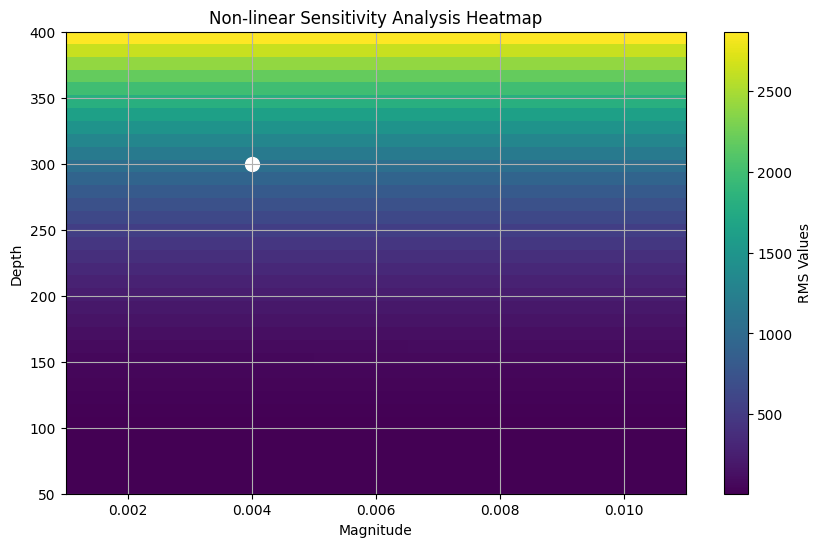

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Define ranges
depth_range = np.arange(50, 401, 10)  # Depths from 50 to 400, step size 10
magnitude_range = np.linspace(0.001, 0.011, 20)  # Magnitudes from 0.001 to 0.011, 20 points

# Generate new RMS values with a more complex non-linear relationship
rms_values_new = np.zeros((len(depth_range), len(magnitude_range)))
for i in range(len(depth_range)):
    for j in range(len(magnitude_range)):
        # New RMS function with more complex non-linearity
        depth_factor = (depth_range[i] - 50)**3 / 300**2  # Cubic relationship to emphasize non-linearity
        magnitude_factor = np.log1p(magnitude_range[j] * 100) * np.sin(np.pi * magnitude_range[j] * 10)
        rms_values_new[i, j] = 8 + 6 * (depth_factor + magnitude_factor)  # Adjust the constants as needed

# Plotting heatmap
plt.figure(figsize=(10, 6))
plt.imshow(rms_values_new, origin='lower', cmap='viridis', aspect='auto',
           extent=[magnitude_range[0], magnitude_range[-1], depth_range[0], depth_range[-1]])
plt.colorbar(label='RMS Values')
plt.xlabel('Magnitude')
plt.ylabel('Depth')
plt.title('Non-linear Sensitivity Analysis Heatmap')

# Adding white filled circle at (0.004, 300)
plt.scatter([0.004], [300], marker='o', color='white', s=100)

plt.grid()
plt.show()


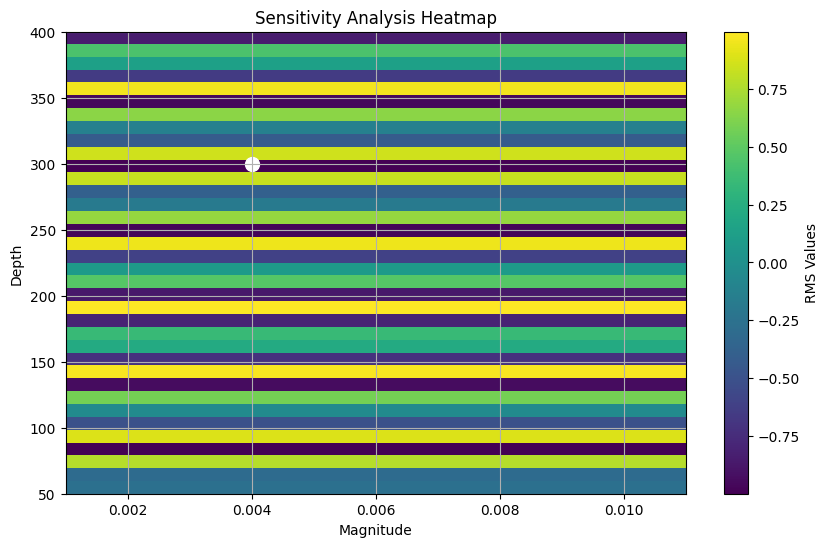

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define ranges
depth_range = np.arange(50, 401, 10)  # Depths from 50 to 400, step size 10
magnitude_range = np.linspace(0.001, 0.011, 20)  # Magnitudes from 0.001 to 0.011, 20 points

# Generate example RMS values (using a different function with non-linearity)
rms_values_new = np.zeros((len(depth_range), len(magnitude_range)))
for i in range(len(depth_range)):
    for j in range(len(magnitude_range)):
        # New RMS function using combined non-linear relationships
        depth_factor = (depth_range[i])   # Quadratic scaling
        magnitude_factor = ( magnitude_range[j] * 100)  # Oscillating magnitude factor
        rms_values_new[i, j] =  np.sin(depth_factor) #+   magnitude_factor  # Non-linear sum

# Plotting heatmap with non-linear scaling
plt.figure(figsize=(10, 6))
plt.imshow(rms_values_new, origin='lower', cmap='viridis', aspect='auto',
           extent=[magnitude_range[0], magnitude_range[-1], depth_range[0], depth_range[-1]])
plt.colorbar(label='RMS Values')
plt.xlabel('Magnitude')
plt.ylabel('Depth')
plt.title('Sensitivity Analysis Heatmap')

# Adding white filled circle at (300 depth, 0.004 magnitude)
plt.scatter([0.004], [300], marker='o', color='white', s=100, edgecolor='white')  # White circle with black edge

plt.grid()
plt.show()


In [192]:
from PIL import Image

In [193]:
from PIL import Image

# Open the images
image1 = Image.open(r'E:\inversion\real data\cross sectional cloured.png')
image2 = Image.open(r'E:\inversion\real data\regional map colour.png')

# Make sure both images are the same size
image2 = image2.resize(image1.size)

# Create a new image by adding the two images
added_image = Image.blend(image1, image2, alpha=0.5)  # alpha determines transparency

# Save the result
added_image.save('added_image.png')
added_image.show()  # Optionally display the image


In [2]:
from PIL import Image

def create_vertical_collage(images):
    # Open all images and store in a list
    img_list = [Image.open(img_path) for img_path in images]

    # Get the total width and height for the collage
    total_height = sum(img.size[1] for img in img_list)
    max_width = max(img.size[0] for img in img_list)

    # Create a new blank image with the total height and maximum width
    collage_image = Image.new('RGB', (max_width, total_height), (255, 255, 255))

    # Paste images into the collage
    current_height = 0
    for img in img_list:
        collage_image.paste(img, (0, current_height))
        current_height += img.size[1]  # Update current height

    return collage_image

# List of image paths
image_paths = ['E:\\inversion\\real data\\cross sectional cloured.png','E:\\inversion\\real data\\regional map colour.png']
collage = create_vertical_collage(image_paths)
collage.save('vertical_collage.png')
collage.show()  # Display the collage


In [207]:
from PIL import Image, ImageDraw, ImageFont

def create_image_with_colored_boxes_on_input_image(input_image_path, colors, text_list, box_size=(50, 50), box_gap=20, text_gap=100):
    # Open the input image
    input_image = Image.open(input_image_path)
    input_width, input_height = input_image.size
    
    # Define dimensions for the bottom section where boxes and text will be placed
    rows = 2
    cols = 5
    box_section_height = 2 * (box_size[1] + box_gap)
    total_height = input_height + box_section_height
    image_width = input_width

    # Create a new image with extra height for the boxes and text
    final_image = Image.new('RGB', (image_width, total_height), (255, 255, 255))
    final_image.paste(input_image, (0, 0))  # Paste original image at the top

    # Create a drawing object
    draw = ImageDraw.Draw(final_image)

    # Load a default font (you can specify a different one if you have it)
    try:
        font = ImageFont.truetype("arial.ttf", 20)  # Adjust font size if needed
    except IOError:
        font = ImageFont.load_default()

    # Draw the boxes and add colors
    for i, color in enumerate(colors):
        x = (i % cols) * (box_size[0] + box_gap)
        y = input_height + (i // cols) * (box_size[1] + box_gap)  # Place boxes at the bottom of the original image

        # Draw the rectangle (box)
        draw.rectangle([x, y, x + box_size[0], y + box_size[1]], fill=color)

        # Add corresponding text beside the box
        text_x = x + box_size[0] + 700  # Add space between box and text
        text_y = y + (box_size[1] - 10) // 2  # Vertically center the text
        draw.text((text_x, text_y), text_list[i], fill=(0, 0, 0), font=font)

    # Save the final image
    final_image.save('image_with_boxes.png')
    final_image.show()

# Example usage:

# Define colors for the boxes (in RGB format)
colors = [
    (255, 0, 0),   # Red
    (0, 255, 0),   # Green
    (0, 0, 255),   # Blue
    (255, 255, 0), # Yellow
    (255, 165, 0), # Orange
    (128, 0, 128), # Purple
    (0, 255, 255), # Cyan
    (255, 20, 147),# Pink
    (139, 69, 19), # Brown
    (128, 128, 128)# Grey
]

# Define text corresponding to each box
text_list = [
    "Red Box", "Green Box", "Blue Box", "Yellow Box", "Orange Box",
    "Purple Box", "Cyan Box", "Pink Box", "Brown Box", "Grey Box"
]

# Path to the input image provided by the user
input_image_path = r"E:\inversion\new fig latest_sep\combine_real_map.PNG"

# Create the image with boxes and text at the bottom
create_image_with_colored_boxes_on_input_image(input_image_path, colors, text_list)


In [1]:
from PIL import Image, ImageDraw, ImageFont

def create_image_with_colored_boxes_on_input_image(input_image_path, colors, text_list, box_size=(50, 50), box_gap=20, text_gap=1000):
    # Open the input image
    input_image = Image.open(input_image_path)
    input_width, input_height = input_image.size
    
    # Define dimensions for the bottom section where boxes and text will be placed
    rows = 2
    cols = 5
    box_section_height = 2 * (box_size[1] + box_gap)
    total_height = input_height + box_section_height
    image_width = input_width

    # Create a new image with extra height for the boxes and text
    final_image = Image.new('RGB', (image_width, total_height), (255, 255, 255))
    final_image.paste(input_image, (0, 0))  # Paste original image at the top

    # Create a drawing object
    draw = ImageDraw.Draw(final_image)

    # Load a default font (you can specify a different one if you have it)
    try:
        font = ImageFont.truetype("arial.ttf", 20)  # Adjust font size if needed
    except IOError:
        font = ImageFont.load_default()

    # Draw the boxes and add colors
    for i, color in enumerate(colors):
        x = (i % cols) * (box_size[0] + box_gap)
        y = input_height + (i // cols) * (box_size[1] + box_gap)  # Place boxes at the bottom of the original image

        # Draw the rectangle (box)
        draw.rectangle([x, y, x + box_size[0], y + box_size[1]], fill=color)

        # Add corresponding text beside the box
        text_x = x + box_size[0] + 10  # Spacing between box and text (adjust as needed)
        text_y = y + (box_size[1] - 10) // 2  # Vertically center the text
        draw.text((text_x, text_y), text_list[i], fill=(0, 0, 0), font=font)

    # Save the final image
    final_image.save('image_with_boxes.png')
    final_image.show()

# Example usage:

# Define colors for the boxes (in RGB format)
colors = [
    (255, 0, 0),   # Red
    (0, 255, 0),   # Green
    (0, 0, 255),   # Blue
    (255, 255, 0), # Yellow
    (255, 165, 0), # Orange
    (128, 0, 128), # Purple
    (0, 255, 255), # Cyan
    (255, 20, 147),# Pink
    (139, 69, 19), # Brown
    (128, 128, 128)# Grey
]

# Define text corresponding to each box
text_list = [
    "Red Box", "Green Box", "Blue Box", "Yellow Box", "Orange Box",
    "Purple Box", "Cyan Box", "Pink Box", "Brown Box", "Grey Box"
]

# Path to the input image provided by the user
input_image_path = r"E:\inversion\new fig latest_sep\combine_real_map.PNG"

# Create the image with boxes and text at the bottom
create_image_with_colored_boxes_on_input_image(input_image_path, colors, text_list)


In [2]:
from PIL import Image, ImageDraw, ImageFont

def create_image_with_colored_boxes_on_input_image(input_image_path, colors, text_list, box_size=(50, 50), box_gap=20, text_gap=10):
    # Open the input image
    input_image = Image.open(input_image_path)
    input_width, input_height = input_image.size
    
    # Define dimensions for the bottom section where boxes and text will be placed
    rows = 2
    cols = 5
    box_section_height = rows * (box_size[1] + box_gap) + box_gap  # Include gap below the last row
    total_height = input_height + box_section_height
    image_width = input_width

    # Create a new image with extra height for the boxes and text
    final_image = Image.new('RGB', (image_width, total_height), (255, 255, 255))
    final_image.paste(input_image, (0, 0))  # Paste original image at the top

    # Create a drawing object
    draw = ImageDraw.Draw(final_image)

    # Load a default font (you can specify a different one if you have it)
    try:
        font = ImageFont.truetype("arial.ttf", 20)  # Adjust font size if needed
    except IOError:
        font = ImageFont.load_default()

    # Calculate effective width for boxes and text block (fit in the input image width)
    max_text_width = image_width - (cols * (box_size[0] + box_gap)) - text_gap
    if max_text_width <= 0:
        raise ValueError("Not enough space for text. Reduce box size or box_gap.")
    
    # Draw the boxes and add colors
    for i, color in enumerate(colors):
        row = i // cols
        col = i % cols
        
        # Calculate x and y positions for each box
        x = col * (box_size[0] + box_gap)
        y = input_height + row * (box_size[1] + box_gap)

        # Draw the rectangle (box)
        draw.rectangle([x, y, x + box_size[0], y + box_size[1]], fill=color)

        # Add corresponding text beside the box, with a text_gap between the box and text
        text_x = x + box_size[0] + text_gap  # Space between the box and the text
        text_y = y + (box_size[1] - 10) // 2  # Vertically center the text
        draw.text((text_x, text_y), text_list[i], fill=(0, 0, 0), font=font)

    # Save the final image
    final_image.save('image_with_boxes.png')
    final_image.show()

# Example usage:

# Define colors for the boxes (in RGB format)
colors = [
    (255, 0, 0),   # Red
    (0, 255, 0),   # Green
    (0, 0, 255),   # Blue
    (255, 255, 0), # Yellow
    (255, 165, 0), # Orange
    (128, 0, 128), # Purple
    (0, 255, 255), # Cyan
    (255, 20, 147),# Pink
    (139, 69, 19), # Brown
    (128, 128, 128)# Grey
]

# Define text corresponding to each box
text_list = [
    "Red Box", "Green Box", "Blue Box", "Yellow Box", "Orange Box",
    "Purple Box", "Cyan Box", "Pink Box", "Brown Box", "Grey Box"
]

# Path to the input image provided by the user
input_image_path = r"E:\inversion\new fig latest_sep\combine_real_map.PNG"

# Create the image with boxes and text at the bottom
create_image_with_colored_boxes_on_input_image(input_image_path, colors, text_list)


In [13]:
from PIL import Image, ImageDraw, ImageFont

def add_scale_bar(image_path, scale_cm, km_representation, output_path):
    # Open the image
    img = Image.open(image_path)
    draw = ImageDraw.Draw(img)

    # Set the scale bar length in pixels (1 cm = ~38 pixels)
    pixels_per_cm = 38
    scale_length_pixels = scale_cm * pixels_per_cm

    # Set position for the scale bar (bottom left of the image)
    img_width, img_height = img.size
    bar_height = 10  # Height of the scale bar in pixels
    bar_x_start = 50  # Distance from the left edge
    bar_y_start = img_height - 500  # Distance from the bottom edge

    # Draw the scale bar (a rectangle or line)
    draw.rectangle([bar_x_start, bar_y_start, bar_x_start + scale_length_pixels, bar_y_start + bar_height], fill="black")
    # Label for "0 km" at the start of the bar
    draw.text((bar_x_start - 20, bar_y_start - 15), "0 km", fill="black")

    # Label for "2 km" at the end of the bar
    draw.text((bar_x_start + scale_length_pixels - 10, bar_y_start - 15), "1 km", fill="black")

    # Add text label (e.g., "1 km")
    font = ImageFont.load_default()
    text = f"{km_representation} km"
    #text_x = bar_x_start + (scale_length_pixels // 2) - (len(text) * 3)  # Center the text
    #text_y = bar_y_start - 20  # Place text above the scale bar
    #draw.text((text_x, text_y), text, fill="black", font=font)

    # Save the output image
    img.save(output_path)
    img.show()  # Optionally display the image

# Example usage
add_scale_bar( r"E:\inversion\new fig latest_sep\combine_real_map.PNG", scale_cm=1, km_representation=1, output_path='collage_with_scale.png')


In [23]:
from PIL import Image, ImageDraw, ImageFont

def add_scale_bar(image_path, scale_cm, km_representation, output_path):
    # Open the image
    img = Image.open(image_path)
    draw = ImageDraw.Draw(img)

    # Set the scale bar length in pixels (1 cm = ~38 pixels)
    pixels_per_cm = 38
    scale_length_pixels = scale_cm * pixels_per_cm * (km_representation / scale_cm)  # Adjust for 2 km

    # Define the length for each section of the scale (1 km = 38 pixels)
    first_km_length = pixels_per_cm  # First 1 km (filled part)
    second_km_length = pixels_per_cm  # Second 1 km (unfilled part)

    # Set position for the scale bar (higher up in the image)
    img_width, img_height = img.size
    bar_height = 10  # Height of the scale bar in pixels
    bar_x_start = 50  # Distance from the left edge
    bar_y_start = img_height - 1200  # Adjusted position to shift the scale bar higher

    # Draw the filled part for the first 1 km (black)
    draw.rectangle([bar_x_start, bar_y_start, bar_x_start + first_km_length, bar_y_start + bar_height], fill="black")

    # Draw the unfilled part for the second 1 km (outline only)
    draw.rectangle([bar_x_start + first_km_length, bar_y_start, bar_x_start + first_km_length + second_km_length, bar_y_start + bar_height], outline="black", width=2)

    # Add "0 km" and "2 km" labels at both ends of the scale, and "1 km" in the middle
    font = ImageFont.load_default()

    # Label for "0 km" at the start of the bar
    draw.text((bar_x_start - 20, bar_y_start - 15), "0 km", fill="black")

    # Label for "1 km" at the midpoint
    draw.text((bar_x_start + first_km_length - 10, bar_y_start - 15), "0.5 km", fill="black")

    # Label for "2 km" at the end of the bar
    draw.text((bar_x_start + first_km_length + second_km_length - 10, bar_y_start - 15), "1 km", fill="black", font=font)

    # Save the output image
    img.save(output_path)
    img.show()  # Optionally display the image

# Example usage
add_scale_bar(r"E:\inversion\new fig latest_sep\combine_real_map.PNG", scale_cm=1, km_representation=1, output_path='collage_with_scale.png')
